In [1]:
import sys
sys.path.append("/home/bl9/gempy/")
#sys.path.append("C:/Users/Fabian/gempy/")
import gempy as gp

%matplotlib inline
import pymc
import numpy as np
import math

from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

import importlib

from operator import itemgetter

from mpl_toolkits.mplot3d import Axes3D

from gempy import Topology

import vtk

from scipy.interpolate import griddata

In [2]:
# Importing the data from csv files and setting extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 50,50,50],
                         #path_f = "./input_data/Fab_TrapModel_Foliations.csv",
                         #path_i = "./input_data/Fab_TrapModel_Points.csv")
                         #path_f = "./input_data/FabLessPoints_Foliations.csv",
                         #path_i = "./input_data/FabLessPoints_Points1.csv")
                         path_f = "./input_data/Fab_Test_Foliations.csv",
                         path_i = "./input_data/Fab_Test_Points.csv")
geo_data.n_faults = 1

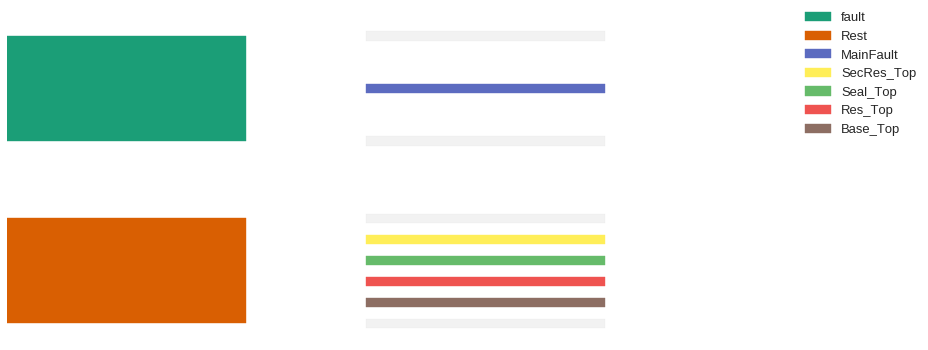

In [9]:
#gp.set_series(geo_data, {"fault":'MainFault', 
#                      "Rest":('Res_Base', 'Res_Top', 'Seal_Top', 'SecondaryReservoir')},
#                       order_series = ["fault","Rest",], order_formations=['MainFault', 
#                                         'SecondaryReservoir', 'Seal_Top', 'Res_Top','Res_Base',
#                                         ]) # for Fab_TrapModel
#
#gp.set_series(geo_data, {"fault":'MainFault', 
#                      "Rest":('Reservoir', 'Seal', 'SecondaryReservoir', 'Overlying')},
#                       order_series = ["fault","Rest",], order_formations=['MainFault', 
#                                         'Overlying', 'SecondaryReservoir', 'Seal','Reservoir',
# #                                        ]) 'for FabLessPoints

gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest":('Base_Top', 'Res_Top', 'Seal_Top', 'SecRes_Top')},
                       order_series = ["fault","Rest",], order_formations=['MainFault', 
                                         'SecRes_Top', 'Seal_Top', 'Res_Top','Base_Top',
                                         ]) #for Fab_Test

In [4]:
#geo_data.set_formation_number(['MainFault','Res_Base', 'Res_Top', 'Seal_Top', 'SecondaryReservoir'])

In [5]:
#gp.data_to_pickle(geo_data, 'BasicFault') #saving data to pickle

In [112]:
#geo_data.interfaces.head()
#gp.get_data(geo_data)

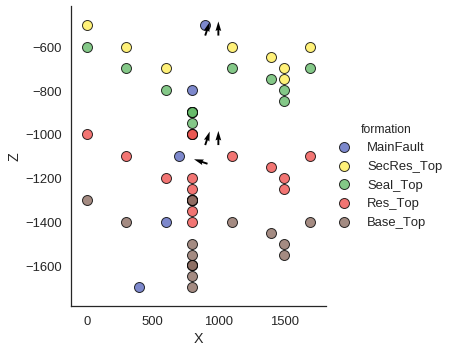

In [10]:
gp.plot_data(geo_data)

In [415]:
gp.plot_data_3D(geo_data)

In [11]:
# INTERPOLATION
interp_data = gp.InterpolatorInput(geo_data, 
                                   u_grade = [3, 3],
                                   compile_theano=True)

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32


In [12]:
# COMPUTATION OF THE MODEL
lith_sol, fault_sol = gp.compute_model(interp_data)

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.735872718292233e-12
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [13]:
# CREATING SURFACES FOR LAYERS
base_surf, base_surf_simp = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[0,1], potential_fault=fault_sol[0,1], n_formation = (interp_data.get_formation_number()['Base_Top']))
res_surf, res_surf_simp = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[0,1], potential_fault=fault_sol[0,1], n_formation = (interp_data.get_formation_number()['Res_Top']))
seal_surf, seal_surf_simp = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[0,1], potential_fault=fault_sol[0,1], n_formation = (interp_data.get_formation_number()['Seal_Top']))
sec_res_surf, sec_res_surf_simp = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[0,1], potential_fault=fault_sol[0,1], n_formation = (interp_data.get_formation_number()['SecRes_Top']))

In [111]:
#geo_data.get_formation_number().keys()

In [248]:
a,b = np.gradient(grid_z0, 40.81632614)
a = np.rot90(a,-1)

asign = np.sign(a)
asignchange = ((np.roll(asign, 1) - asign) != 0).astype(int)

#print(asignchange)
asignchange2 = ((np.roll(asign, -1) - asign) != 0).astype(int)


asc3 = np.logical_or(asignchange, asignchange2)

asc3[:,0]= 0
asc3[:,1]= 0
asc3[:,-1] = 0
asc3[-1,:] = 0
print(asc3)

bsign = np.sign(b)
bsignchange = ((np.roll(bsign, 1) - bsign) != 0).astype(int)
bsignchange2 = ((np.roll(bsign, -1) - bsign) != 0).astype(int)

bsc3 = np.logical_or(bsignchange, bsignchange2)

bsc3[:,0]= 0
bsc3[:,-1] = 0
bsc3[:,-2] = 0
bsc3[:,-3] = 0
bsc3[-1,:] = 0
#print(bsignchange)


asignchange = np.rot90(asignchange,1)
asc3 = np.rot90(asc3,1)

c = np.logical_and(asc3,bsc3)

[[False False  True False False False False False False False False False
  False False False False False False False False False False False False
  False  True  True False False False False False False False False False
  False False False False False False False False False False False  True
   True False]
 [False False  True False False False False False False False False False
  False False False False False False False False False False False False
  False  True  True False False False False False False False False False
  False False False False False False False False False False  True  True
  False False]
 [False False  True  True False False False False False False False False
  False False False False False False False False False False False False
  False  True  True False False False False False False False False False
  False False False False False False False False False False  True  True
  False False]
 [False False  True  True False False False False False False False

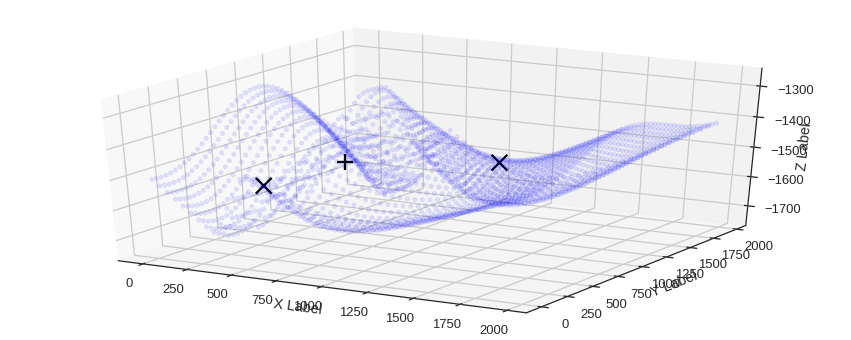

In [387]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
ax.scatter(pot_spill_Xcoord, pot_spill_Ycoord, pot_spill_Zcoord, c="black", alpha = 1, marker='x', s = 250)
ax.scatter(fault_leak_Xcoord, fault_leak_Ycoord, fault_leak_Zcoord, c="black", alpha = 1, marker='+', s = 250)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [333]:
grad_zero = saddle_p_all == 1
grid_z0[~grad_zero]= np.nan
grid_z0

array([[           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan],
       [           nan,            nan,            nan,            nan,
                   nan,

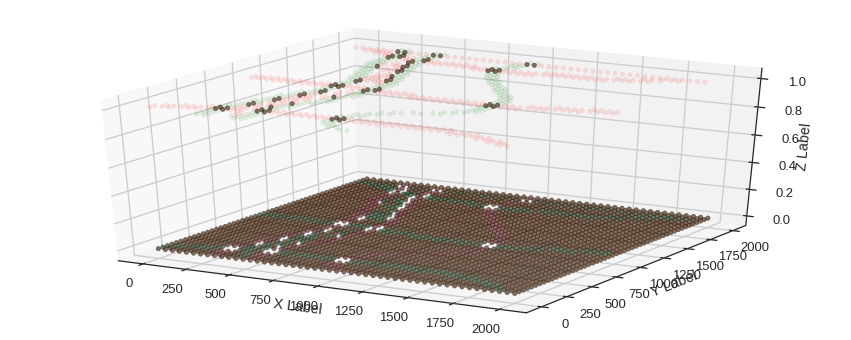

In [249]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
ax.scatter(grid_x, grid_y, asc3, c="r", alpha = 0.1)
ax.scatter(grid_x, grid_y, bsc3, c="g", alpha = 0.1)
ax.scatter(grid_x, grid_y, c, c="black", alpha = 0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

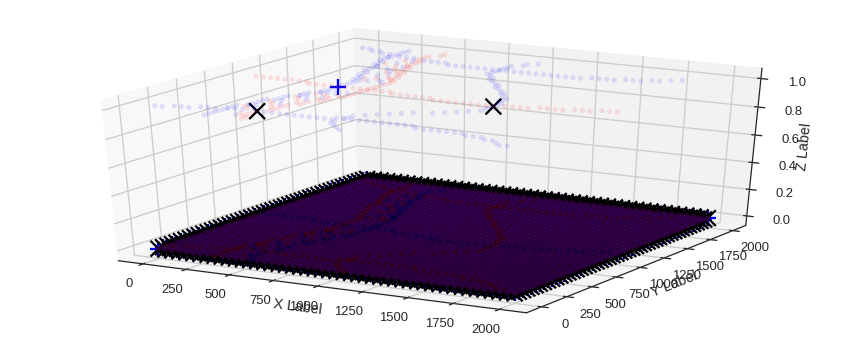

In [372]:
#fault_line = grid_minX[grid_maxX]
figsize(15,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
ax.scatter(grid_x, grid_y, grid_minY, c="b", alpha = 0.1)
ax.scatter(grid_x, grid_y, grid_maxY, c="r", alpha = 0.1)
ax.scatter(grid_x, grid_y, grid_minX, c="b", alpha = 0.1)
ax.scatter(grid_x, grid_y, grid_maxX, c="r", alpha = 0.1)
ax.scatter(grid_x, grid_y, spill_points, c="black", alpha = 1, marker='x', s = 250)
ax.scatter(grid_x, grid_y, leak_point, c="b", alpha = 1, marker='+', s= 250)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

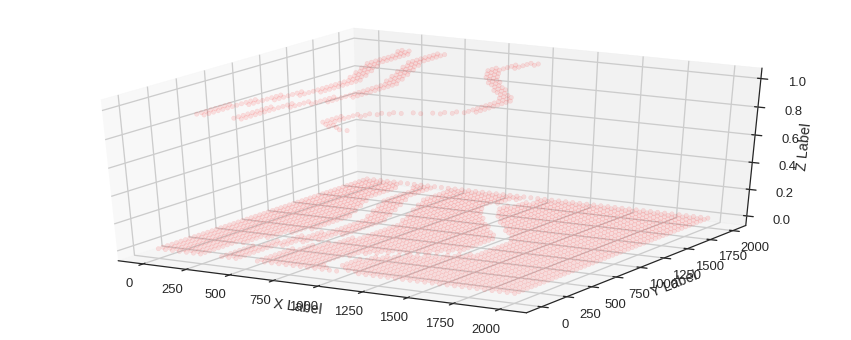

In [245]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
#ax.scatter(grid_x, grid_y, -a, c="r", alpha = 0.1)
#ax.scatter(grid_x, grid_y, -asignchange, c="g", alpha = 0.1)
ax.scatter(grid_x, grid_y, bsc3, c="r", alpha = 0.1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [29]:
#geo_data.get_formations()

In [6]:
geo_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'Overlying': 2,
 'Reservoir': 5,
 'Seal': 4,
 'SecondaryReservoir': 3}

In [16]:
gp.plot_surfaces_3D(geo_data, [base_surf, sec_res_surf, seal_surf, res_surf], 
                    [base_surf_simp, sec_res_surf_simp, seal_surf_simp, res_surf_simp], plot_data=True)

In [186]:
#sys.path.append("/home/bl9/gempy/gempy/")
#
#import Visualization 
#importlib.reload(Visualization)

<module 'Visualization' from '/home/bl9/gempy/gempy/Visualization.py'>

In [114]:
#w = Visualization.vtkVisualization(interp_data.geo_data_res, real_time=True )
#w.set_surfaces([overlying_surf, sec_res_surf, seal_surf, res_surf], 
#               [overlying_surf_simp, sec_res_surf_simp, seal_surf_simp, res_surf_simp],
#               #formations_names_l, formation_numbers_l,
#                )
#w.interp_data  = interp_data
#if True:
#    w.set_interfaces()
#    w.set_foliations()
#w.render_model()

In [174]:
gp.plot_surfaces_3D(geo_data, [res_surf], [res_surf_simp])

In [12]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'Overlying': 2,
 'Reservoir': 5,
 'Seal': 4,
 'SecondaryReservoir': 3}

In [166]:
grid_x, grid_y = np.meshgrid(np.unique(interp_data.geo_data_res.grid.grid[:, 0]),
                             np.unique(interp_data.geo_data_res.grid.grid[:, 1]))

#grid_z0 = griddata(res_surf[:,:2], res_surf[:,2],
#                   (grid_x, grid_y), method='linear')
(grid_x*rescale_f)-np.min(grid_x)*rescale_f

array([[0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       ..., 
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998]], dtype=object)

In [165]:
grid_x, grid_y = np.meshgrid(np.unique(geo_data.grid.grid[:, 0]),
                             np.unique(geo_data.grid.grid[:, 1]))

grid_z0 = griddata(res_surf[:,:2], res_surf[:,2],
                   (grid_x, grid_y), method='linear')

grid_x

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [   40.81632614,    40.81632614,    40.81632614, ...,
           40.81632614,    40.81632614,    40.81632614],
       [   81.63265228,    81.63265228,    81.63265228, ...,
           81.63265228,    81.63265228,    81.63265228],
       ..., 
       [ 1918.36730957,  1918.36730957,  1918.36730957, ...,
         1918.36730957,  1918.36730957,  1918.36730957],
       [ 1959.18371582,  1959.18371582,  1959.18371582, ...,
         1959.18371582,  1959.18371582,  1959.18371582],
       [ 2000.        ,  2000.        ,  2000.        , ...,
         2000.        ,  2000.        ,  2000.        ]])

In [139]:
interp_data.geo_data_res.interfaces['X'][interp_data.geo_data_res.interfaces['formation'] == 'Res_Top']*rescale_f

27    1850.38
28    1850.38
29    1850.38
30    1850.38
31    1850.38
32    1850.38
33    1850.38
34    1050.38
35    1350.38
36    1650.38
37    1850.38
38    2150.38
39    2450.38
40    2550.38
41    1850.38
42    2550.38
43    2750.38
Name: X, dtype: object

In [153]:
x_ref=(interp_data.extent_rescaled['X'].values[1]-interp_data.extent_rescaled['X'].values[0])
bla = np.ones_like(grid_x)
bla = bla*x_ref
(bla-grid_x)*rescale_f

array([[  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       ..., 
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06]])

2014.0

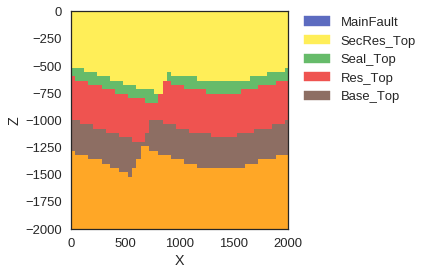

In [126]:
#%matplotlib notebook
%matplotlib inline
gp.plot_section(geo_data, lith_sol[0,0], 25, plot_data=0)

In [18]:
resolution = 50
model_size = 2000
scale_factor = (model_size/resolution) #original grid in [m]/grid resolution --> what if model not cubic?

In [403]:
# SPILL AND LEAK POINT FUNCTIONS

# Finding the spill point
#def spill_point(res_surface):
#    mini = argrelextrema(res_surface[:,2], np.less, order=10)
#    minima = np.array(list(zip(np.take(res_surface[:,1], mini[0]), np.take(res_surface[:,0], mini[0]), np.take(res_surface[:,2], mini[0]))))
#    fault_thresh = minima[:,1] > 700 #taking only relevant side by setting a threshold visually estimated, best: 20
#    spill_min_line = minima[fault_thresh]
#    spill_pos = np.array(np.argmax(spill_min_line[:,2]))
#    spill_z = np.take(spill_min_line[:,2], spill_pos)
#    spill_p = np.array([np.take(spill_min_line[:,1], spill_pos), np.take(spill_min_line[:,0],
#                                spill_pos), np.take(spill_min_line[:,2], spill_pos)])
#    
#    # Horizontal plane defined by z-pos of spill
#    if True:
#        spill_bottom = np.ones_like(res_surface)
#        spill_bottom[:,0] = res_surface[:,0]
#        spill_bottom[:,1] = res_surface[:,1]
#        spill_bottom[:,2] = spill_z    
#    
#    return spill_z, spill_p, spill_min_line, spill_bottom
#
## Finding the leak point ( critically inefficient method! takes 10s!)
#def leak_point(res_surface):
#    counter = 0
#    # Creating empty lists and arrays to save values
#    xvals = []
#    yvals = []
#    zvals = []
#    leak_min = np.empty((0,3), dtype=int)
#    #leak_min = np.empty([3,], dtype=int)
#    
#    for i in np.unique(res_surface[:,1]):
#        
#    #while counter < model_size:
#        #print(counter)
#        for e in res_surface:
#            # Looking at a slice along y-axis for y = e[1] = counter, 
#            # and appending x,y,z-values into lists
#            # This is a way of RESORTING the array as needed
#            #if int(e[1]) == counter:
#            if e[1] == i:
#                xvals.append(e[0])
#                yvals.append(e[1])
#                zvals.append(e[2])
#            
#        # Saving x,y,z-values as lists/arrays      
#        zvals = np.array(zvals)
#        yvals = np.array(yvals)
#        xvals = np.array(xvals)
#
#        # Looking fore minima positions in z-array
#        min_pos = argrelextrema(zvals, np.less, order=10)
#        
#        # Saving x,y,z-positions of minima
#        ypos = yvals[min_pos]
#        xpos = xvals[min_pos]
#        mins = zvals[min_pos]
#        
#        # Condition: Check if any minimum was found and if any data is given at y = counter
#        # If no minimum found, restart loop at next iteration
#        # This way, we can work with the data that coesn't cover every 1 step along the model
#        # (such as the surface vertices)
#        if len(mins) == 0:
#            counter += 1
#            #lists have to be emptied again
#            xvals = []
#            yvals = []
#            zvals = []
#            continue
#        
#        #np.append(leak_min, mins) -----> what did I use this for?
#        
#        # Create and array element to save coordinates of minima
#        mins_pos = np.array(list(zip(xpos, ypos, mins)))
#        # Save minima of slice into array of ALL minima
#        leak_min = np.vstack((leak_min, mins_pos))
#
#        # Empty lists for next iteration
#        xvals = []
#        yvals = []
#        zvals = []
#    
#        counter += 1
#        
#    #leak_min = np.delete(leak_min, 0, 0) #what does this do???
#    
#    # Result of the loop above is one or SEVERAL lines of minima ("leak lines")
#    # only want to look at the line bordering the fault surface
#    # need for a general function/method to limit to only that line!
#    # For now: Taking only relevant side by setting a threshold that is visually estimated
#    near_fault_thresh = leak_min[:,0] < 1500
#    leak_line = leak_min[near_fault_thresh]
#    
#    # The highest point of the leak line is the leak point!
#    leak_pos = np.array(np.argmax(leak_line[:,2]))
#    leak_z = np.take(leak_line[:,2], leak_pos)
#
#    # Full coordinates of the leak point as array element
#    leak_p = np.array([np.take(leak_line[:,1], leak_pos), np.take(leak_line[:,0], leak_pos), np.take(leak_line[:,2], leak_pos)])
#    
#    # Creating a horizontal plane defined by the leak point z-position, in shape of res_surface
#    leak_bottom = np.ones_like(res_surface)
#    leak_bottom[:,0] = res_surface[:,0]
#    leak_bottom[:,1] = res_surface[:,1]
#    leak_bottom[:,2] = leak_z
#   
#    return leak_z, leak_p, leak_line, leak_bottom

In [423]:
def spill_leak_P(interp_data, res_surf):    
    grid_x, grid_y = np.meshgrid(np.unique(interp_data.geo_data_res.grid.grid[:, 0]),
                             np.unique(interp_data.geo_data_res.grid.grid[:, 1]))

    grid_x=(grid_x*rescale_f)-(np.min(grid_x)*rescale_f)
    grid_y=(grid_y*rescale_f)-(np.min(grid_y)*rescale_f)
    
    grid_z0 = griddata(res_surf[:,:2], res_surf[:,2],
                       (grid_x, grid_y), method='linear')
    
    rel_order = 1
    
    #check grid_z0 for max and min in directions x and y
    #direction x
    minX1,minX2 = argrelextrema(grid_z0,np.less,order=rel_order,axis=1)
    maxX1,maxX2 = argrelextrema(grid_z0,np.greater,order=rel_order,axis=1)
    grid_minX = np.zeros_like(grid_z0)
    grid_minX[minX1,minX2]=1
    grid_maxX = np.zeros_like(grid_z0)
    grid_maxX[maxX1,maxX2]=1
    
    #direction y
    minY1,minY2 = argrelextrema(grid_z0,np.less,order=rel_order,axis=0)
    maxY1,maxY2 = argrelextrema(grid_z0,np.greater,order=rel_order,axis=0)
    grid_minY = np.zeros_like(grid_z0)
    grid_minY[minY1,minY2]=1
    grid_maxY = np.zeros_like(grid_z0)
    grid_maxY[maxY1,maxY2]=1
    
    #check for saddle points
    saddle_p1 = np.logical_and(grid_minX,grid_maxY)
    saddle_p2 = np.logical_and(grid_minY,grid_maxX)
    saddle_p_all= np.logical_or(saddle_p1, saddle_p2)
    
    # this should find saddle points relative to X and Y directions
    # problem of finding other points in a rotated direction?
    
    
    # fault leak line
    # check for minima line that is on footwall side compared to max contact of layer with fault
    fault_max_line_bool = np.copy(grid_maxX)
    fault_max_line = fault_max_line_bool.argmax(axis=1)
    fault_max = np.max(fault_max_line) # max of fault-layer contact as threshold
        
    fleak_line = np.copy(grid_minX).astype(int)
    fleak_line[:,fault_max:]=0 # 15 chosen as threshold --> better method?
    
    #fleak_line_z0 = grid_z0[fleak_line]
    #leak_max = fleak_line==np.nanargmax(fleak_line_z0)
    #print(np.nanargmax(fleak_line_z0))
    ### NOT FINISHED: DEFINE LEAK POINT OVER LEAK LINE MAX?!
    
    # distinguish anticlinal spill points from fault leak points:
    pot_leak_point = np.logical_and(fleak_line,saddle_p_all)
    
    spill_points = saddle_p_all - pot_leak_point
    
    # leak and spill point 3D coordinates
    # LEAK POINT
    pot_leak_Xcoord = grid_x[pot_leak_point]
    pot_leak_Ycoord = grid_y[pot_leak_point]
    pot_leak_Zcoord = grid_z0[pot_leak_point]
    
    pot_leak_3Dcoord = np.array(list(zip(pot_leak_Xcoord, pot_leak_Ycoord, pot_leak_Zcoord)))
    
    if pot_leak_3Dcoord.size == 0:
        fault_leak_3Dcoord = np.array([])
    else:
        max_leak_pos = pot_leak_3Dcoord[:,2].argmax(axis=0)
        fault_leak_3Dcoord = pot_leak_3Dcoord[max_leak_pos,:]
        
    # SPILL POINT
    pot_spill_Xcoord = grid_x[spill_points]
    pot_spill_Ycoord = grid_y[spill_points]
    pot_spill_Zcoord = grid_z0[spill_points]
    
    pot_spill_3Dcoord = np.array(list(zip(pot_spill_Xcoord, pot_spill_Ycoord, pot_spill_Zcoord)))
    
    if pot_spill_3Dcoord.size == 0:
        anticline_spill_3Dcoord = np.array([])
    else:
        max_spill_pos = pot_spill_3Dcoord[:,2].argmax(axis=0)
        anticline_spill_3Dcoord = pot_spill_3Dcoord[max_spill_pos,:]   
        
    #print('SP',anticline_spill_3Dcoord)
    #print('LP',fault_leak_3Dcoord)
    if False:
        figsize(15,6)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        #ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
        ax.scatter(grid_x, grid_y, grid_minY, c="b", alpha = 0.1)
        ax.scatter(grid_x, grid_y, grid_maxY, c="r", alpha = 0.1)
        ax.scatter(grid_x, grid_y, grid_minX, c="b", alpha = 0.1)
        ax.scatter(grid_x, grid_y, grid_maxX, c="r", alpha = 0.1)
        ax.scatter(grid_x, grid_y, spill_points, c="black", alpha = 1, marker='x', s = 250)
        ax.scatter(grid_x, grid_y, fleak_line, c="b", alpha = 1, marker='+', s= 250)
        #ax.scatter(grid_x, grid_y, leak_max[2], c="g", alpha = 1, marker='+', s= 250)
        
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        
        plt.show()
    
    plot_spill_leak(res_surf, anticline_spill_3Dcoord, fault_leak_3Dcoord, grid_x, grid_y, grid_z0)
    
    return anticline_spill_3Dcoord, fault_leak_3Dcoord

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:56: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


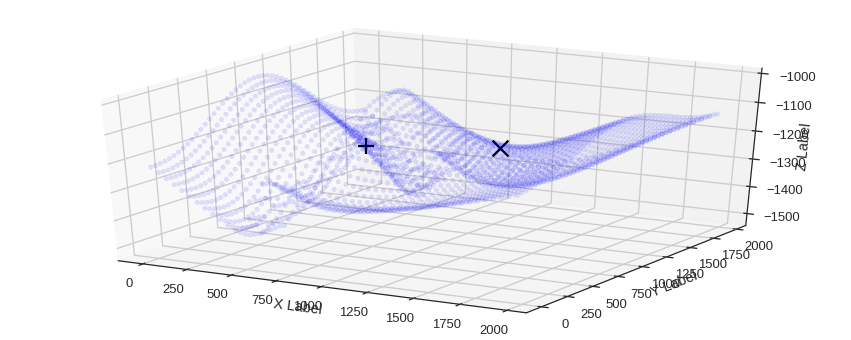

(array([ 1387.75512695,   857.1428833 , -1158.96513885]),
 array([  612.24487305,   938.7755127 , -1216.15727251]))

In [424]:
spill_leak_P(interp_data, res_surf)

In [177]:
# MASKING FUNCTIONS

# Masking function that confines to voxels which are part fo the reservoir formation,
# in the footwall side and above the z-horizontal defined by the spill or leak point
def res_mask(lith,fault, bottom_z, formation_nr):
    mask = np.ones_like(lith)
    mask[~formation_nr] = False
    mask[fault.astype(bool)] = False
    bottom_z = bottom_z/scale_factor
    mask = mask.reshape(50,50,50)
    mask[:,:,:bottom_z] = False
    mask = mask.reshape(125000,)
    return mask

# Function that sets all voxels of lith_block which are equal (or closest to) to the spill_z
# horizontal as belonging to the overlying seal 
# (the voxels is located on the border of reservoir and seal):
def set_spill_to_seal(geo_data, lith, max_z):
    lith_spill = np.argmin(np.abs(geo_data.grid.grid[:, 2]+np.abs(max_z)))
    bol_lith_spill = geo_data.grid.grid[:, 2] == geo_data.grid.grid[:, 2][lith_spill]
    lith[bol_lith_spill] = 6
    return lith
        ### Hpw to check in here, if single spill voxel = reservoir (5)??? Need x and y pos?

# Masking that confines the volume to ONLY those reservoir traps (from res_mask)
# that are NOT connected to the borders of the model (open system)
# Traps defined as CLOSED systems
def topo_analysis(lith, fault):
    fig = plt.figure()
    traps = []
    # Padding of lith- and fault-block (creating border sections, formation number = 8)
    lith_pad = (np.pad(lith.reshape(50,50,50), 1, 'constant', constant_values = (8,8)))
    fault_pad = (np.pad(fault.reshape(50,50,50), 1, 'constant', constant_values = (8,8)))
    topo = Topology.Topology(lith_pad, fault_pad)
    #topo.draw_section(25)
    topo_block = topo.labels
    # Finding sections which are possible traps in the reservoir (formation number = 7)
    topo_keys = [int(k) for k in topo.lith_to_labels_lot["7"].keys()]
    pad_keys = [int(p) for p in topo.lith_to_labels_lot["8"].keys()]
    #over_keys = [int(o) for o in topo.lith_to_labels_lot["2"].keys()]
    #sec_res_keys = [int(sr) for sr in topo.lith_to_labels_lot["3"].keys()]
    bool_block = np.zeros_like(topo_block)
    # Check for each possible trap section, if it is connected to a border
    for tk in topo_keys:
        print('Checking Section:', tk)
        # Saving enclosed sections as traps
        if topo.check_adjacency(tk, pad_keys[0]) == False:
            print("TRAP FOUND, section:", tk)
            traps.append(tk)
    if traps == []:
        print('No trap found! =(')
    else:
        for i in traps:
            # Creating a mask from the trap sections in the label block
            top_bool = topo_block == i
            bool_block[top_bool] = True
            ### Extra check for juxtaposition with layers above seal
            #if topo.check_adjacency(i, over_keys[0]) == False and topo.check_adjacency(i, sec_res_keys[0]) == False:
            #    print('Trap sealed upwards.')
            #    top_bool = topo_block == i
            #    bool_block[top_bool] = True
            #else: 
            #    print("Juxtaposition, no trap sealing.")
    # Removing padding
    trap_mask = bool_block[1:-1,1:-1,1:-1]
    #plt.imshow(trap_mask[:,25,:].T, origin="lower")
    #plt.show()
    return trap_mask

In [439]:
# MAIN FUNCTION: Calculation of maximum fill volume in reservoir traps

def max_trap_vol(interp_data, lith, fault, res_surface, fault_sealing):
    # calculate spill point
    spill_point, leak_point = spill_leak_P(interp_data, res_surface)
    if spill_point.size == 0:
        spill_z = -2000
        print('No SPILL POINT found!')
    else:
        print('SPILL POINT:',spill_point)
        spill_z = spill_point[2]
    #spill_z, spill_p, spill_min_line, spill_bottom = spill_point(res_surface)
    # calculate leak point
    if leak_point.size == 0:
        print('No LEAK POINT found!')
        leak_z = -2000
    else:
        print('Leak Point:',leak_point)
        leak_z = leak_point[2]
    #leak_z, leak_p, leak_line, leak_bottom = leak_point(res_surface)
    bottom_surface = np.ones_like(res_surface)
    
    #PLOTTING OF SPILL, LEAK AND BOTTOM POSSIBLE HERE:
    #plot_spill(res_surface, spill_min_line, spill_p)
    #plot_leak(res_surface, leak_line, leak_p)
    #plot_trap(res_surface, bottom_surface, spill_p, leak_p)
    #PRINTING OF SPILL, LEAK:
    #print('Spill_Z:', spill_z)
    #print('Leak_Z:', leak_z)
    
    # Check for "down-to" z-horizon, maximum depth of reservoir
    # Check for fault sealing and subsequent relevance of leak point
    max_z = np.max([spill_z, leak_z])
    if fault_sealing == True:
        if max_z == spill_z:
            print("Spill point defines trap.")
            print("Fault is sealing. Down to spill.")
            #bottom_surface = spill_bottom
        else:
            print("Fault leak point above spill point.")
            max_z = spill_z
            print("...but fault sealing. Down to spill.")
            #bottom_surface = spill_bottom
    else:
        if max_z == spill_z:
            print("Spill point defines trap.")
            print("Fault is pathway. Down to spill.")
            #bottom_surface = spill_bottom
        else:
            print("Fault leak point above spill point.")
            print("Cross-fault leakage. Down to leak.")
            #bottom_surface = leak_bottom      
    
    #print('Max_Z:', max_z)
    
    res_nr = lith == interp_data.get_formation_number()['Base_Top']
    pre_trap_mask = res_mask(lith, fault, max_z, res_nr)
          
    # volume cells for counting
    vol_cells = 0      
    
    pre_trap_mask_bool = (pre_trap_mask == True)
    # Check if there is anaything in the reservoir mask at all
    if np.count_nonzero(pre_trap_mask_bool) == 0:
        print("No res_formation above max_z!")
        return 0, lith, bottom_surface, pre_trap_mask
    else:
        lith[pre_trap_mask_bool] = 7                           # setting reservoir above bottom on footwall side 
                                                            # (incl. outside trap) to formation value = 7  
        if max_z == spill_z:
            lith = set_spill_to_seal(geo_data, lith, max_z)
        
        #test = lith.reshape(125000)                       
        #for i in range(len(test)):                         #to test pre-trap-masking volume
        #    if test[i] == 7:
        #        vol_cells +=1
        #res_vol = ((scale_factor)**3) * vol_cells 
        #print("VOLUME INCLUDING OUTSIDE TRAP:" ,res_vol)
        
        final_trap_mask = topo_analysis(lith, fault)
        #lith[pre_trap_mask_bool] = 5
        lith[final_trap_mask] = 9                         # setting final trap to formation value = 9
        vol_cells = np.count_nonzero(final_trap_mask)
        
        #calulate volume from cells
        trap_vol = ((scale_factor)**3) * vol_cells 
        
        #return the maximum reservoir volume
        return trap_vol, lith, bottom_surface, final_trap_mask

In [294]:
# PLOTTING FUNCTIONS: Spill and leak point visualization
def plot_spill_leak(res_surface, spill_point, leak_point, grid_x, grid_y, grid_z0):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
    ax.scatter(spill_point[0],spill_point[1],spill_point[2], c="black", alpha = 1, marker='x', s = 250)
    if leak_point.size != 0:        
        ax.scatter(leak_point[0],leak_point[1],leak_point[2], c="black", alpha = 1, marker='+', s = 250)
        
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()

#def plot_spill(res_surface, spill_min_line, spill_p):
#    fig = plt.figure()
#    ax = fig.add_subplot(111, projection='3d')
#    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
#    ax.scatter(-spill_min_line[:,0], -spill_min_line[:,1], spill_min_line[:,2], c='r', s = 50)
#    ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 200)
#    
#    ax.set_xlabel('X Label')
#    ax.set_ylabel('Y Label')
#    ax.set_zlabel('Z Label')
#
#    plt.show()
#
#def plot_leak(res_surface, leak_line, leak_p):
#    fig = plt.figure()
#    ax = fig.add_subplot(111, projection='3d')
#    
#    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
#    ax.scatter(-leak_line[:,1], -leak_line[:,0], leak_line[:,2], c='r', s = 50)
#    ax.scatter(-leak_p[1], -leak_p[0], leak_p[2], c='green', s = 200)
#    
#    ax.set_xlabel('X Label')
#    ax.set_ylabel('Y Label')
#    ax.set_zlabel('Z Label')
#    
#    plt.show()
#    
#def plot_trap(res_surface, bottom_surface, spill_p, leak_p):
#    fig = plt.figure()
#    ax = fig.add_subplot(111, projection='3d')
#    ax.scatter(-bottom_surface[:,1], -bottom_surface[:,0], bottom_surface[:,2], c="r", alpha = 0.05)
#    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
#    ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 1000)
#    ax.scatter(-leak_p[1], -leak_p[0], leak_p[2], c='green', s = 1000)
#
#    
#    ax.set_xlabel('X Label')
#    ax.set_ylabel('Y Label')
#    ax.set_zlabel('Z Label')
#    
#    plt.show()

In [278]:
sec_res_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'SecRes_Top']['Z']
seal_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Seal_Top']['Z']
res_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Res_Top']['Z']
base_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Base_Top']['Z']

res_len = len(interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Res_Top']['Z'])

In [279]:
rescale_f = interp_data.rescaling_factor

# SETTING Z-UNCERTAINTIES FOR EACH LAYER TOP

#z_unc_over = pymc.Normal('z_unc_over_bot', 0, 1./0.0001)
#z_unc_seal_top = pymc.Normal('z_unc_seal_top', 0, 1./0.0003)
#z_unc_res_top = pymc.Normal('z_unc_res_top', 0, 1./0.0005)
#z_unc_res_bot = pymc.Normal('z_unc_res_bot', 0, 1./0.0008)

std_secres_top = 10
std_seal_top = 20
std_res_top = 40
std_base_top = 60

z_unc_secres_top = pymc.Normal('z_unc_secres_top', 0, 1./np.square(std_over/rescale_f))
z_unc_seal_top = pymc.Normal('z_unc_seal_top', 0, 1./np.square(std_seal_top/rescale_f))
z_unc_res_top = pymc.Normal('z_unc_res_top', 0, 1./np.square(std_res_top/rescale_f))
z_unc_base_top = pymc.Normal('z_unc_base_top', 0, 1./np.square(std_res_bot/rescale_f))

#z_unc_over = 0
#z_unc_seal_top = 0
#z_unc_res_top = 
#z_unc_res_bot = 0

# FAULT SEALING UNCERTAINTY (True = fault sealing)
fault_sealing = pymc.Bernoulli('fault_sealing_unc',p=.5)

In [280]:
# Boolean conditions to find data points for each formation
base_top_cond = interp_data.geo_data_res.interfaces['formation'] == 'Base_Top'
res_top_cond = interp_data.geo_data_res.interfaces['formation'] == 'Res_Top'
seal_top_cond = interp_data.geo_data_res.interfaces['formation'] == 'Seal_Top'
secres_top_cond = interp_data.geo_data_res.interfaces['formation'] == 'SecRes_Top'

Z-Variations top to bottom: 0.0010759495084823039 -0.0028609699886887646 -0.0026320413842704127 -0.00614664731410921


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:57: UserWarning: Boolean Serie

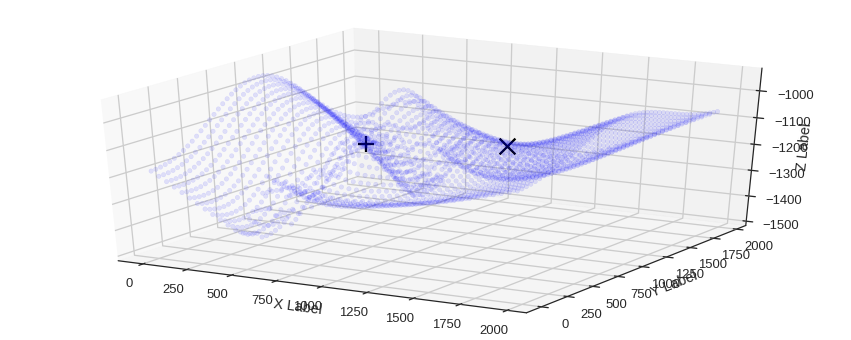

SPILL POINT: [ 1428.57141113   857.1428833  -1096.56250022]
Leak Point: [  612.24487305   938.7755127  -1160.38671181]
Spill point defines trap.
Fault is sealing. Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Checking Section: 18
TRAP FOUND, section: 18
Checking Section: 21
Maximum reservoir volume: 17984000.0 m³


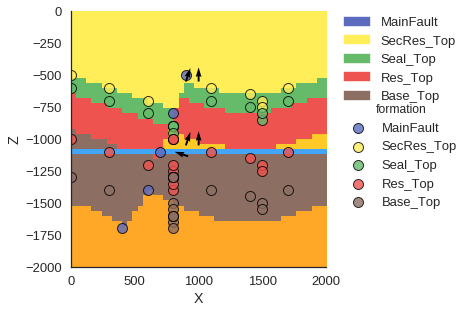

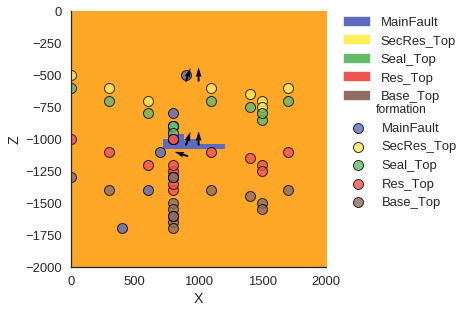

In [441]:
# MODLE FUNCTIONS 

# Updating of interp_data points with new z-values resulting from z-positional uncertainty
@pymc.deterministic
def interp_unc(value=0, z_unc_secres_top = z_unc_secres_top, z_unc_seal_top=z_unc_seal_top, 
                  z_unc_res_top = z_unc_res_top, z_unc_base_top = z_unc_base_top):
    new_z_secres_top = sec_res_z + z_unc_secres_top
    new_z_seal_top = seal_z + z_unc_seal_top
    new_z_res_top = res_z + z_unc_res_top
    new_z_base_top = base_z + z_unc_base_top   
    print('Z-Variations top to bottom:', z_unc_secres_top, z_unc_seal_top, z_unc_res_top, z_unc_base_top)
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'SecRes_Top'] = new_z_secres_top
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Seal_Top'] = new_z_seal_top
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Res_Top'] = new_z_res_top
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Base_Top'] = new_z_base_top
    return interp_data

# Calculating formation thickness based on z-difference between a bottom and top point on the footwall (fw)

# This is done using interp_data, where X,Y and Z-values are rescaled according to the rescaling_factor.
# Value[1] of extent_rescaled equals the maximum extent of model (here: 2000).
# So if we want to find the rescaled X-position 1600, we simply calculated 2000-400 rescaled (see fw_x_cond)
# Y_mid defines that we are looking at a central position (in y-direction) in the model.
# The difference in z between two points has to be rescaled to the original scale again.

# Reservoir thickness
@pymc.deterministic
def res_th(interp_data=interp_unc):
    rescale_f = interp_data.rescaling_factor
    fw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (400/rescale_f))
    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
    points_fw = interp_data.geo_data_res.interfaces[fw_x_cond]
    points_fw = points_fw[y_mid]   
    fw_rb_z = points_fw[base_top_cond]['Z'].values*rescale_f
    fw_sb_z = points_fw[res_top_cond]['Z'].values*rescale_f
    return np.abs(fw_sb_z-fw_rb_z)

#Seal thickness
@pymc.deterministic
def seal_th(interp_data=interp_unc):
    rescale_f = interp_data.rescaling_factor
    fw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (400/rescale_f))
    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
    points_fw = interp_data.geo_data_res.interfaces[fw_x_cond]
    points_fw = points_fw[y_mid]   
    fw_r2b_z = points_fw[seal_top_cond]['Z'].values*rescale_f
    fw_sb_z = points_fw[secres_top_cond]['Z'].values*rescale_f
    return np.abs(fw_r2b_z-fw_sb_z)

# Secondary reservoir thickness
@pymc.deterministic
def sec_res_th(interp_data=interp_unc):
    rescale_f = interp_data.rescaling_factor
    fw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (400/rescale_f))
    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
    points_fw = interp_data.geo_data_res.interfaces[fw_x_cond]
    points_fw = points_fw[y_mid]   
    fw_r2b_z = points_fw[seal_top_cond]['Z'].values*rescale_f
    fw_ob_z = points_fw[secres_top_cond]['Z'].values*rescale_f
    return np.abs(fw_ob_z-fw_r2b_z)

# Volumetric calculation 
@pymc.deterministic
def structural_model(interp_data=interp_unc, fault_sealing=fault_sealing):
    lith_sol, fault_sol = gp.compute_model(interp_data)
    lith_block = lith_sol[0,0]
    fault_block = fault_sol[0,0]  
    res_top_surf, res_top_surf_simp = gp.get_surfaces(
                                          interp_data = interp_data, potential_lith=lith_sol[0,1], 
        potential_fault=fault_sol[0,1], n_formation = interp_data.get_formation_number()['Res_Top'])
    max_vol, lith_sol[0,0], bottom, trap = max_trap_vol(interp_data, lith_block, fault_block, res_top_surf, fault_sealing)
    print("Maximum reservoir volume: %s m³" % max_vol)
    #gp.plot_section(geo_data, lith_sol[0,0], 5, plot_data =1)
    gp.plot_section(geo_data, lith_sol[0,0], 25, plot_data =1)
    #gp.plot_section(geo_data, lith_sol[0,0], 45, plot_data =1)
    gp.plot_section(geo_data, trap, 25, plot_data =1)
    return lith_sol, fault_sol, max_vol

In [442]:
iterations = 10

In [443]:
model = pymc.Model([interp_unc, z_unc_res_top, z_unc_base_top, z_unc_seal_top, z_unc_secres_top, fault_sealing, structural_model, res_th, seal_th, sec_res_th])

Z-Variations top to bottom: -0.0036693385566775524 -0.001556976050393643 0.005953697788582533 0.01290388607678034


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.876226799324342e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:56: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


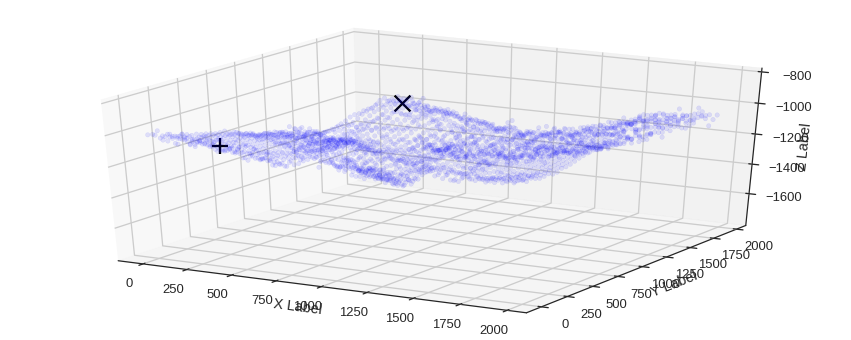

SPILL POINT: [ 816.32653809  938.7755127  -906.28938585]
Leak Point: [  367.34692383    40.81632614 -1039.91273992]
Spill point defines trap.
Fault is pathway. Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Checking Section: 57
TRAP FOUND, section: 57
Checking Section: 53
TRAP FOUND, section: 53
Checking Section: 60
TRAP FOUND, section: 60
Checking Section: 44
Checking Section: 52
TRAP FOUND, section: 52
Checking Section: 54
TRAP FOUND, section: 54
Checking Section: 65
TRAP FOUND, section: 65
Maximum reservoir volume: 1984000.0 m³
 [-------          20%                  ] 2 of 10 complete in 11.6 sec

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Serie

Z-Variations top to bottom: -0.00015199076054501313 0.00400265781298383 -0.0018357426332817912 0.015639215819230248


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.595897013653927e-12
  ' condition number: {}'.format(rcond), RuntimeWarning)


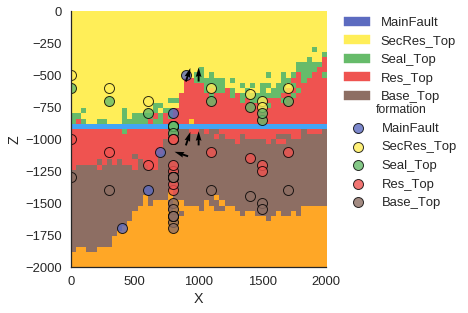

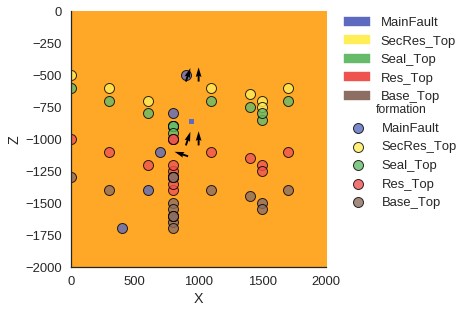

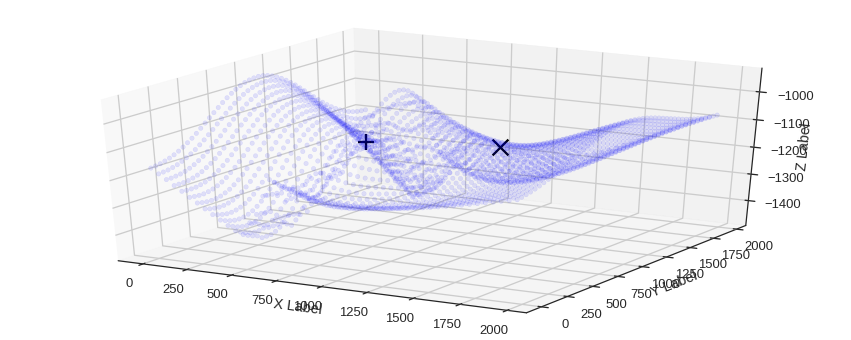

SPILL POINT: [ 1387.75512695   857.1428833  -1094.28278506]
Leak Point: [  612.24487305   938.7755127  -1141.79603782]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 18
TRAP FOUND, section: 18
Checking Section: 21
Maximum reservoir volume: 18048000.0 m³
 [-----------      30%                  ] 3 of 10 complete in 23.2 secZ-Variations top to bottom: 0.0021955243897854903 0.007230607001164974 0.010566636115968997 0.02879158106061664


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.7102534882240184e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


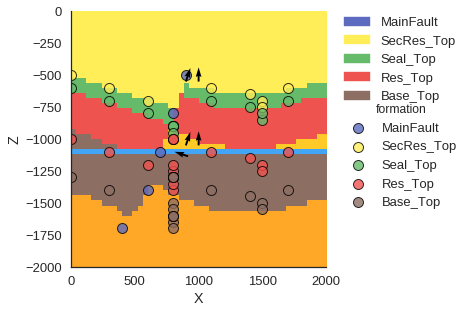

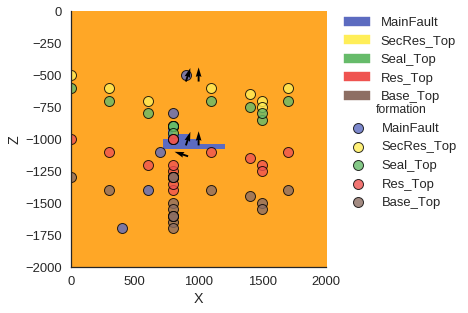

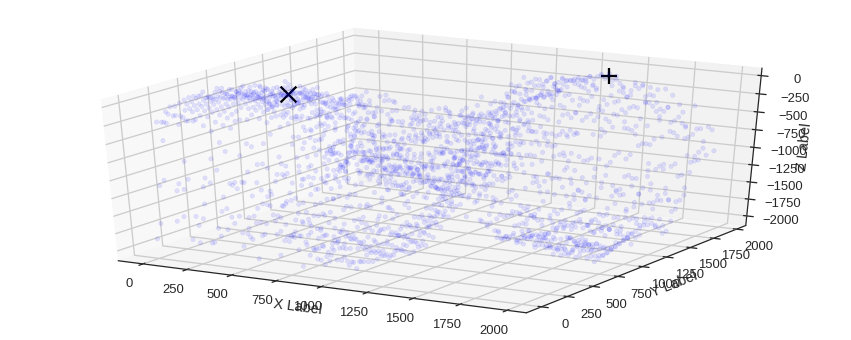

SPILL POINT: [ 367.34692383  653.06121826  -54.36193077]
Leak Point: [ 1428.57141113  1836.73474121   -59.53089   ]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 2330
Checking Section: 2745
Checking Section: 1968
Checking Section: 2644
Checking Section: 2555
Checking Section: 2890
Checking Section: 2381
Checking Section: 2130
Checking Section: 1872
Checking Section: 2125
Checking Section: 2936
Checking Section: 2196
Checking Section: 1815
Checking Section: 2068
Checking Section: 2640
Checking Section: 2338
Checking Section: 1957
Checking Section: 2609
Checking Section: 1818
Checking Section: 2454
Checking Section: 1883
Checking Section: 2239
Checking Section: 2294
Checking Section: 2407
Checking Section: 2763
Checking Section: 1846
Checking Section: 2089
Checking Section: 1833
Checking Section: 2325
Checking Section: 2197
Checking Section: 2553
No trap found! =(
Maximum reservoir volume: 0.0 m³
 [---------------  40%                  ] 4 of 10 complete in

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.855362013690773e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


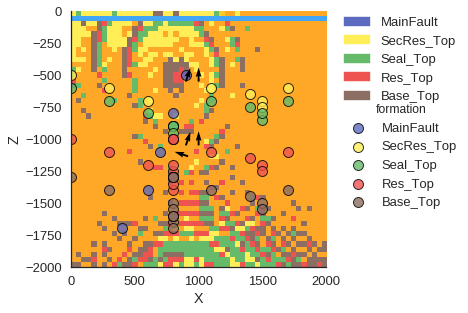

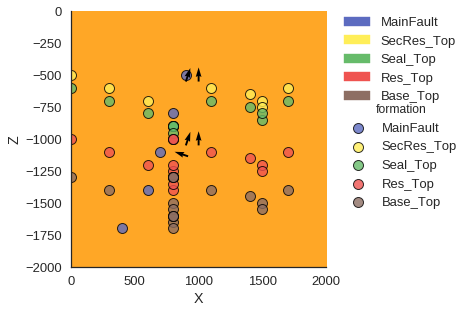

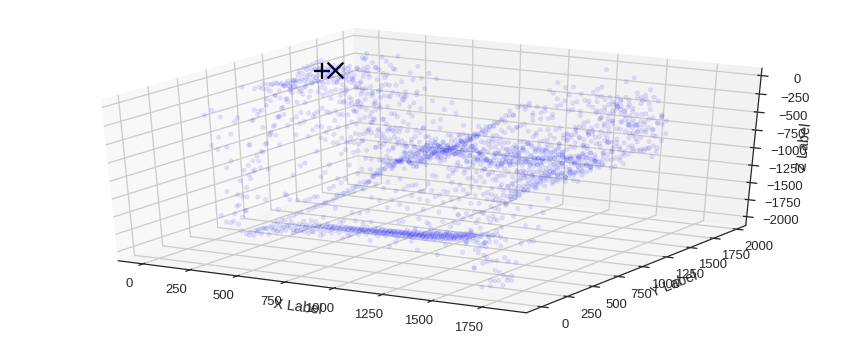

SPILL POINT: [  122.44898224  1469.38769531  -141.36946087]
Leak Point: [  122.44898224  1346.9387207   -101.2417918 ]
Fault leak point above spill point.
...but fault sealing. Down to spill.
Checking Section: 738
TRAP FOUND, section: 738
Checking Section: 825
TRAP FOUND, section: 825
Checking Section: 642
Checking Section: 795
TRAP FOUND, section: 795
Maximum reservoir volume: 192000.0 m³
 [-----------------50%                  ] 5 of 10 complete in 56.9 secZ-Variations top to bottom: 0.00037049764689840937 -8.527890636954004e-05 -0.010821293154054659 -0.004764376777975787


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.609543191129588e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


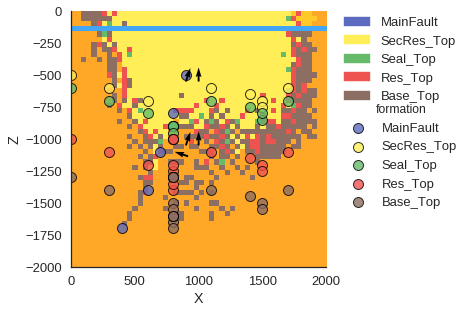

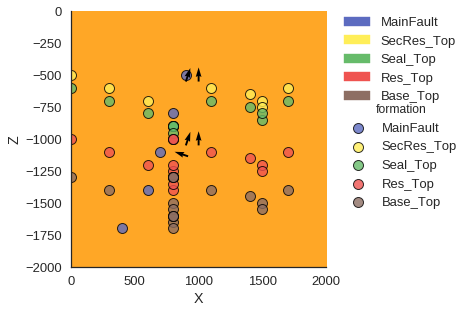

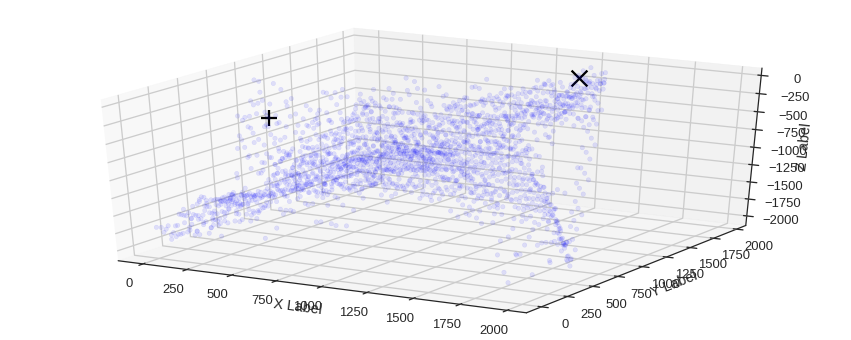

SPILL POINT: [ 1224.48974609  1918.36730957  -177.20892668]
Leak Point: [ 122.44898224  857.1428833  -537.9215412 ]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 2848
TRAP FOUND, section: 2848
Checking Section: 2915
Checking Section: 2598
TRAP FOUND, section: 2598
Checking Section: 2754
TRAP FOUND, section: 2754
Checking Section: 2580
TRAP FOUND, section: 2580
Checking Section: 2398
Checking Section: 2465
TRAP FOUND, section: 2465
Checking Section: 2830
TRAP FOUND, section: 2830
Checking Section: 2672
TRAP FOUND, section: 2672
Checking Section: 2476
TRAP FOUND, section: 2476
Checking Section: 2886
TRAP FOUND, section: 2886
Checking Section: 2796
Checking Section: 2695
TRAP FOUND, section: 2695
Checking Section: 2936
TRAP FOUND, section: 2936
Checking Section: 2196
TRAP FOUND, section: 2196
Checking Section: 2606
Checking Section: 2711
Checking Section: 2861
TRAP FOUND, section: 2861
Checking Section: 2705
TRAP FOUND, section: 2705
Checking Section: 2539
C

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0146376726332239e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


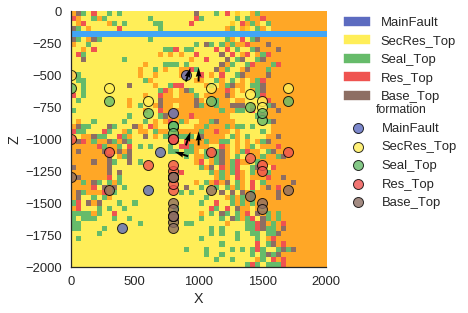

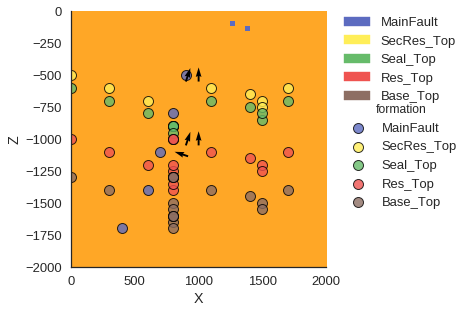

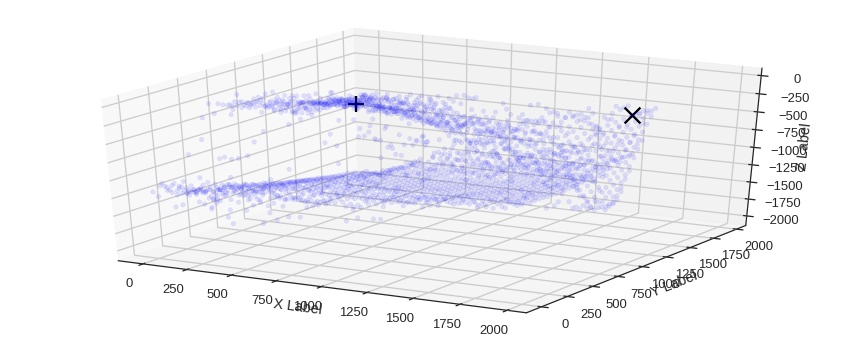

SPILL POINT: [ 1877.55102539  1224.48974609  -196.19828308]
Leak Point: [  367.34692383  1265.30615234  -459.34607399]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 441
Checking Section: 455
TRAP FOUND, section: 455
Checking Section: 480
TRAP FOUND, section: 480
Checking Section: 547
Checking Section: 496
TRAP FOUND, section: 496
Checking Section: 535
TRAP FOUND, section: 535
Checking Section: 497
TRAP FOUND, section: 497
Checking Section: 534
TRAP FOUND, section: 534
Checking Section: 576
Checking Section: 403
TRAP FOUND, section: 403
Checking Section: 558
Checking Section: 582
Checking Section: 492
Maximum reservoir volume: 576000.0 m³
 [-----------------70%------            ] 7 of 10 complete in 89.1 secZ-Variations top to bottom: -0.007404204664403987 0.001834319100171597 -0.019412019883950967 0.012995895051564578


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9921689298207923e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


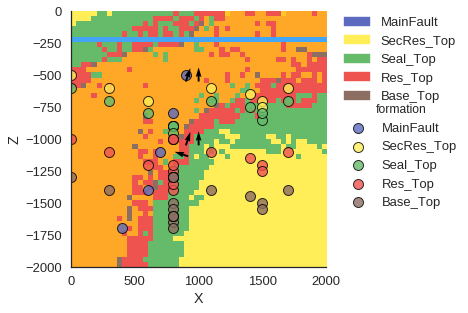

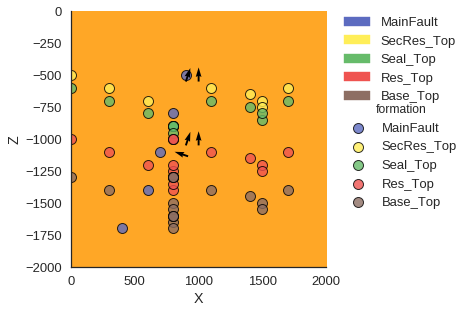

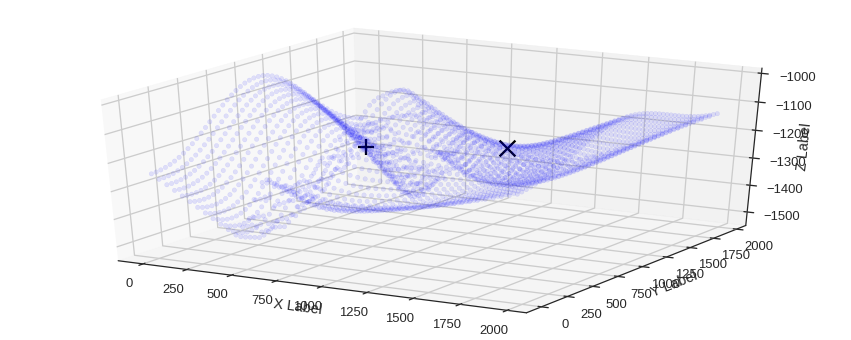

SPILL POINT: [ 1428.57141113   857.1428833  -1158.69628948]
Leak Point: [  612.24487305   938.7755127  -1224.09587966]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 17
TRAP FOUND, section: 17
Checking Section: 20
Maximum reservoir volume: 12736000.0 m³
 [-----------------80%----------        ] 8 of 10 complete in 100.7 secZ-Variations top to bottom: -0.005296611354028937 -0.0027420674140537153 -0.006271745685803795 -0.036359044736380575


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.958928647024745e-12
  ' condition number: {}'.format(rcond), RuntimeWarning)


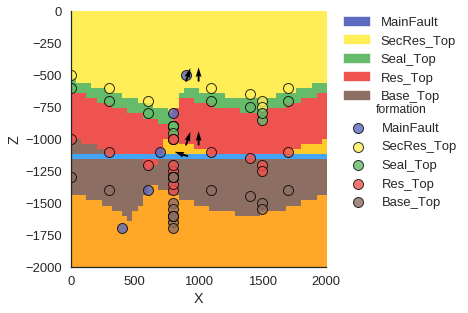

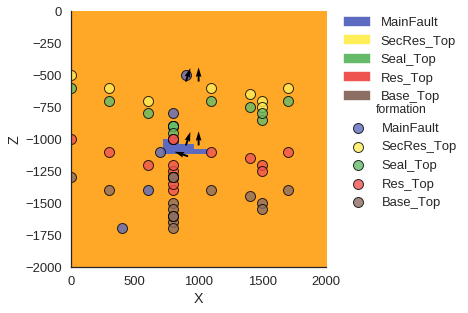

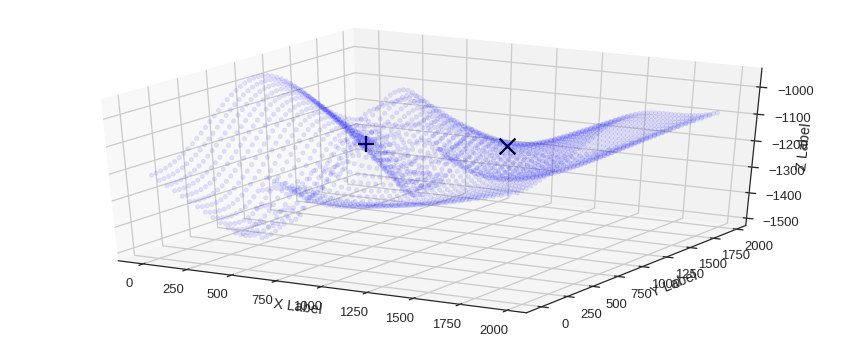

SPILL POINT: [ 1428.57141113   857.1428833  -1109.87909616]
Leak Point: [  612.24487305   938.7755127  -1174.18394003]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 18
TRAP FOUND, section: 18
Checking Section: 22
Maximum reservoir volume: 14272000.0 m³
 [-----------------90%--------------    ] 9 of 10 complete in 113.2 secZ-Variations top to bottom: 0.00041949124122651595 0.0007443570257851048 -0.003366003693351741 0.02216785452307231


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.811872461677578e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


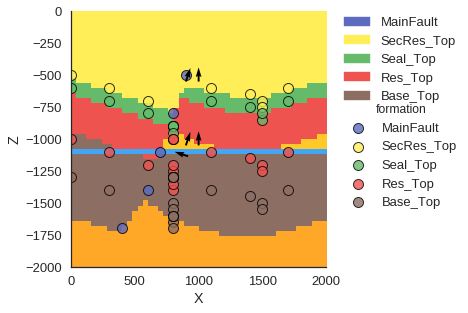

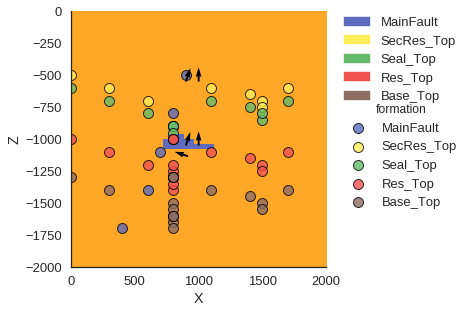

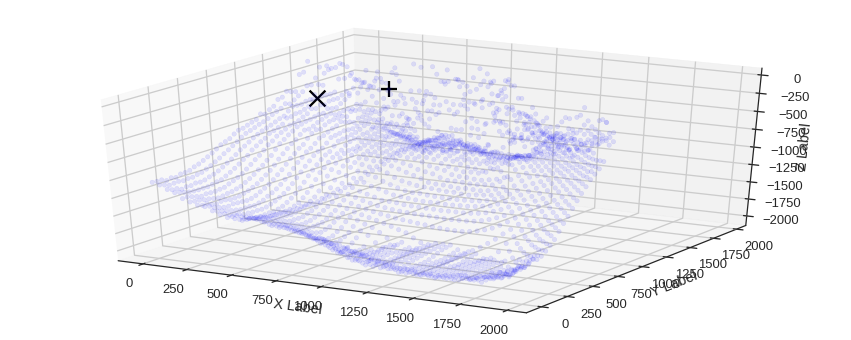

SPILL POINT: [  122.44898224  1306.12243652  -478.6060678 ]
Leak Point: [  285.71429443  1714.2857666   -488.04146638]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 35
No trap found! =(
Maximum reservoir volume: 0.0 m³
 [-----------------100%-----------------] 10 of 10 complete in 125.4 secZ-Variations top to bottom: -0.001317329243812063 0.0030477874661529263 0.010483249110761934 0.029414239993200218


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9923921887321505e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


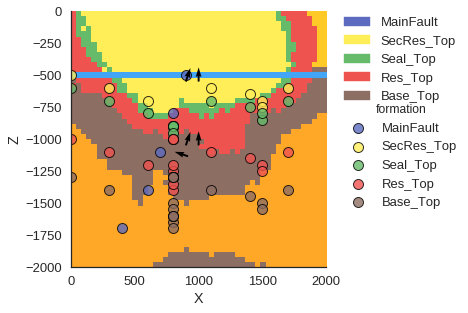

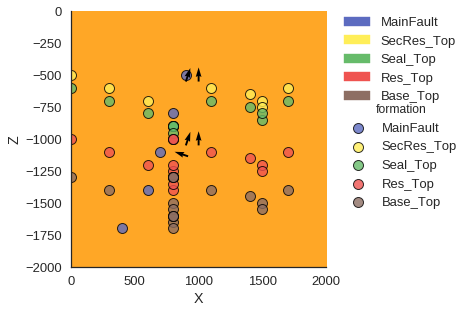

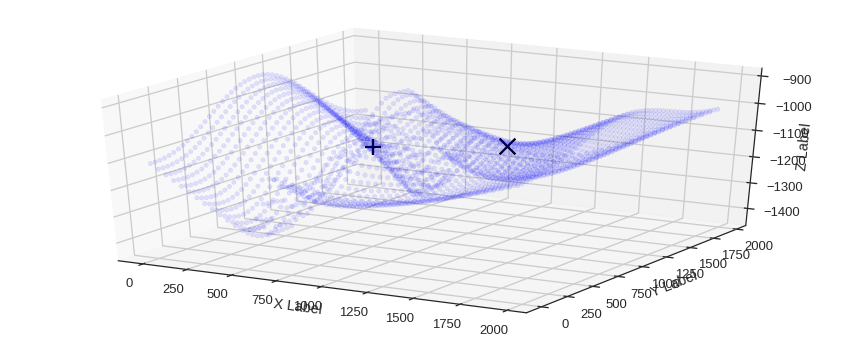

SPILL POINT: [ 1428.57141113   857.1428833  -1048.5095218 ]
Leak Point: [  653.06121826   938.7755127  -1120.43179091]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 23
Checking Section: 20
TRAP FOUND, section: 20
Maximum reservoir volume: 19456000.0 m³
 [------------------110%-------------------] 11 of 10 complete in 137.3 sec

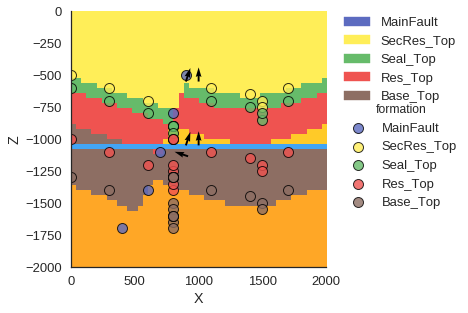

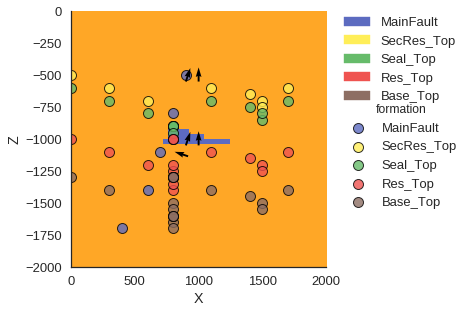

In [444]:
M = pymc.MCMC(model)
M.sample(iter=iterations)

In [445]:
res_top_unc_trace = M.trace('z_unc_res_top')[:]
fault_sealing_trace = M.trace('fault_sealing_unc')[:]
structural_model_trace = M.trace('structural_model')[:] #[0]=lith_sol,[1]=fault:sol,[2]=max_volume

fw_res_th_trace = M.trace('res_th')[:]
fw_seal_th_trace = M.trace('seal_th')[:]
fw_sec_res_th_trace = M.trace('sec_res_th')[:]

#for j in range(iterations):
#    plt.figure()
#    #plt.title('Change in res_top: %s' % bla[j])
#    #print(bla[j])
#    if fault_sealing == True:
#        print("Fault is sealed.")
#    else:
#        print("Fault is permeable.")
#    print("Max. trap volume = ", trap_volume_trace[j][2])
#    gp.plot_section(geo_data, trap_volume_trace[j][0][0,0], 25, plot_data =1)

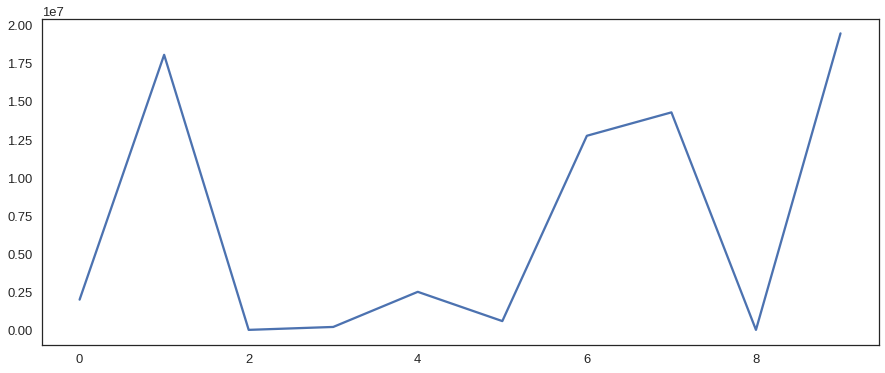

In [446]:
max_volume_trace = structural_model_trace[:,2]
plt.plot(max_volume_trace)

ZeroDivisionError: integer division or modulo by zero

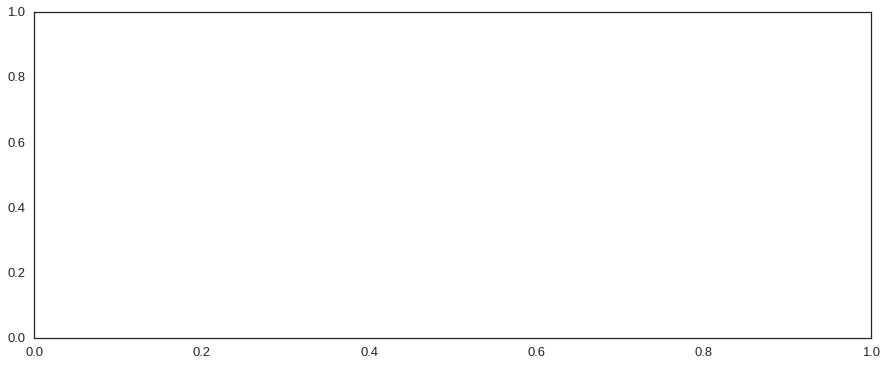

In [447]:
plt.plot(fw_res_th_trace)
plt.plot(fw_seal_th_trace)
plt.plot(fw_sec_res_th_trace)

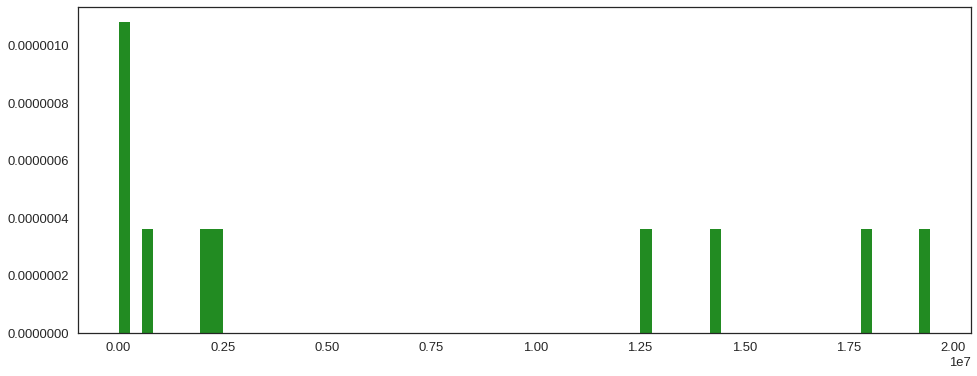

In [448]:
figsize(16, 6)

#_hist1 = plt.hist(max_volume_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")
volumes = max_volume_trace
mask = volumes == 0
masked_trace = volumes[~mask]
_hist1 = plt.hist(max_volume_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "forestgreen")
#_hist1 = plt.hist(masked_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")

In [44]:
#LOSS FUNCTIONS
estimates_s = np.arange(0,60000000, 10000)

#weight factors
ov = 1.25
ov_b = 2
uv_b = 1.5

#risk parameters
risks_s = np.arange(0.5, 1.6, 0.25)

#risk neutral
def volume_loss4(estimate_s, true_s):
        loss_s = np.zeros_like(true_s)
        underest = (estimate_s < true_s) 
        underest_bad = (estimate_s <= 0) & (true_s > 0)
        overest = (estimate_s > true_s) 
        overest_bad = (estimate_s > 0) & (true_s <= 0)
        loss_s[underest] = (true_s[underest] - estimate_s)
        loss_s[underest_bad] = (true_s[underest_bad] - estimate_s)*uv_b
        loss_s[overest] = (estimate_s - true_s[overest])*ov
        loss_s[overest_bad] = (estimate_s - true_s[overest_bad])*ov_b
        return loss_s

#including risk
def volume_lossR(estimate_s, true_s, risk_s):
        loss_s = np.zeros_like(true_s)
        underest = (estimate_s < true_s) 
        underest_bad = (estimate_s == 0) & (true_s > 0)
        overest = (estimate_s > true_s) 
        overest_bad = (estimate_s > 0) & (true_s == 0)
        loss_s[underest] = (true_s[underest] - estimate_s)
        loss_s[underest_bad] = (true_s[underest_bad] - estimate_s)*(uv_b*(risk_s**-0.5))
        loss_s[overest] = (estimate_s - true_s[overest])*(ov*risk_s)
        loss_s[overest_bad] = np.abs((true_s[overest_bad]-estimate_s))*(ov_b*risk_s)
        return loss_s
    
#def volume_lossR(estimate_s, true_s, risk_s):
#        loss_s = np.zeros_like(true_s)
#        underest = (estimate_s < true_s) 
#        underest_bad = (estimate_s <= 0) & (true_s > 0)
#        overest = (estimate_s > true_s) 
#        overest_bad = (estimate_s > 0) & (true_s <= 0)
#        loss_s[underest] = (true_s[underest] - estimate_s)
#        loss_s[underest_bad] = (true_s[underest_bad] - estimate_s)*(uv_b*(risk_s**-0.5))
#        loss_s[overest] = (estimate_s - true_s[overest])*(ov*risk_s)
#        loss_s[overest_bad] = (estimate_s - true_s[overest_bad])*(ov_b*risk_s)
#        return loss_s

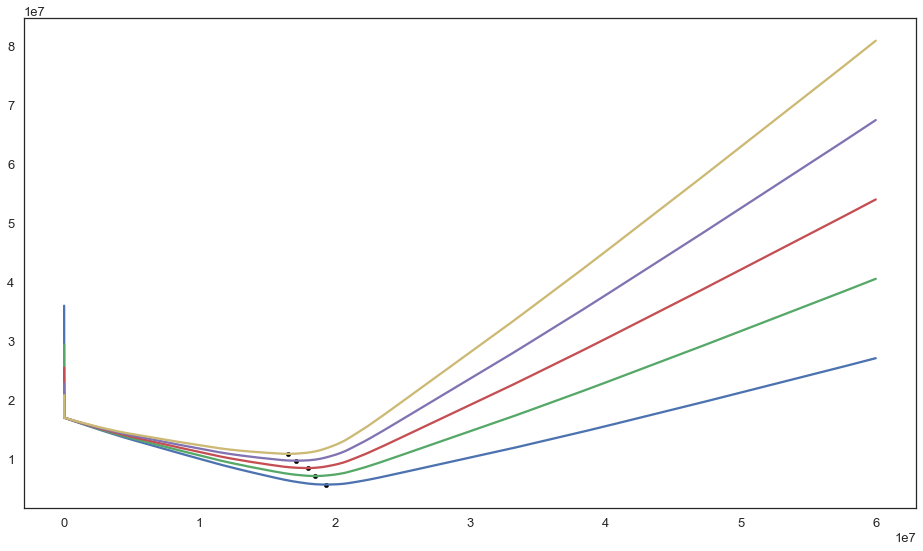

In [45]:
figsize(16, 9)

# No reduced uncertainty, different risks
BA_before = np.zeros_like(risks_s)
EL_before = np.zeros_like(risks_s)
expected_loss = lambda estimate_s, risk_s: volume_lossR(estimate_s, masked_trace, risk_s).mean()

counter = 0
for r in risks_s:
    loss = [expected_loss(e, r) for e in estimates_s]
    _min_score = sop.fmin(expected_loss, -40, args=(r,),disp = False)
    #print(_min_score)
    if _min_score < 0:
        _min_score = 0
    plt.plot(estimates_s, loss, label = "Risk r "+str(r))
    plt.scatter(_min_score, expected_loss(_min_score,r), s = 20, color = 'black')
    #lt.vlines(_min_results, 0, 0.02, color = 'black', linestyles="--")
    #print("Bayes action (minimum) at risk r %.2f: %.2f" % (r, _min_score))
    BA_before[counter] = _min_score
    EL_before[counter] = expected_loss(_min_score,r)
    counter += 1


In [449]:
# ADDING THICKNESS LIKELIHOOD FUNCTIONS
#Additional information, updating with likelihoods

#return fw_res_th, fw_seal_th, fw_sec_res_th, fw_rb_z, fw_sb_z, fw_r2b_z, fw_ob_z

std1 = 10
std2 = 20
std3 = 50

@pymc.stochastic
def res_th_likelihood(value = 0, res_th=res_th):
    return pymc.normal_like(res_th, 250., 1./np.square(std3))

@pymc.stochastic
def seal_th_likelihood(value = 0, seal_th=seal_th):
    return pymc.normal_like(seal_th, 400., 1./np.square(std2))

@pymc.stochastic
def sec_res_th_likelihood(value = 0, sec_res_th=sec_res_th):
    return pymc.normal_like(sec_res_th, 120., 1./np.square(std1))

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.4105294084129077e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:56: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


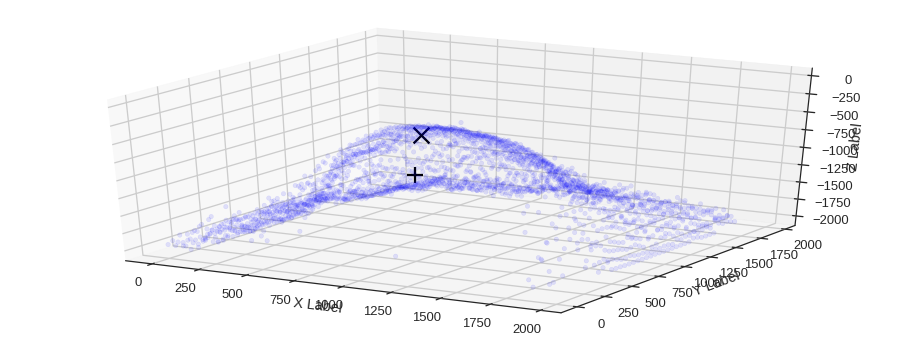

SPILL POINT: [ 1306.12243652    40.81632614   -53.54426485]
Leak Point: [  571.42858887  1224.48974609 -1399.06379082]
Spill point defines trap.
Fault is sealing. Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Checking Section: 506
Checking Section: 478
No trap found! =(
Maximum reservoir volume: 0.0 m³
Z-Variations top to bottom: 0.0001591884294430847 -0.007598835343042304 -0.00734331952977229 0.015304480774439857
Z-Variations top to bottom: 0.0001591884294430847 -0.007598835343042304 -0.00734331952977229 -0.004280693173600395
Z-Variations top to bottom: 0.0001591884294430847 -0.024397246647620868 -0.00734331952977229 -0.004280693173600395
Z-Variations top to bottom: 0.0001591884294430847 -0.007598835343042304 -0.0075046895440646156 

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Serie

-0.004280693173600395


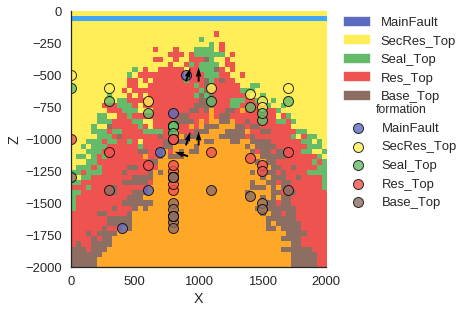

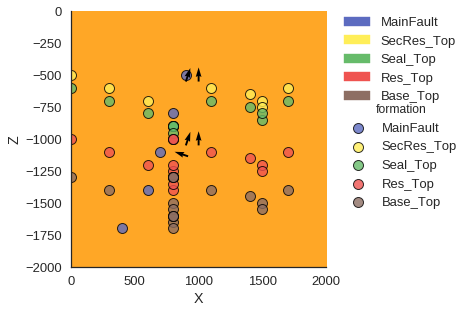

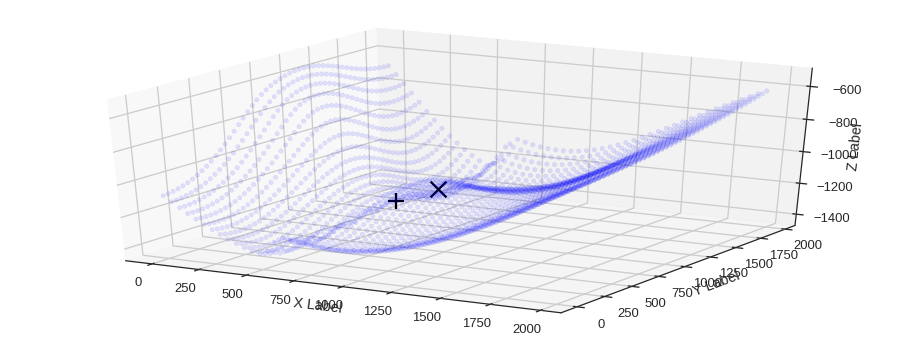

SPILL POINT: [  857.1428833    938.7755127  -1133.70642797]
Leak Point: [  612.24487305   979.59185791 -1256.53712335]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 17
No trap found! =(
Maximum reservoir volume: 0.0 m³
 [-------          20%                  ] 2 of 10 complete in 26.2 secZ-Variations top to bottom: -0.002006047780062958 -0.007598835343042304 -0.0075046895440646156 -0.004280693173600395
Z-Variations top to bottom: -0.002006047780062958 -0.007598835343042304 -0.0075046895440646156 -0.002385487730470303
Z-Variations top to bottom: -0.002006047780062958 -0.005417676780322123 -0.0075046895440646156 -0.002385487730470303
Z-Variations top to bottom: -0.002006047780062958 -0.005417676780322123 -0.0027874620190282955 -0.002385487730470303


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.8570744735319346e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


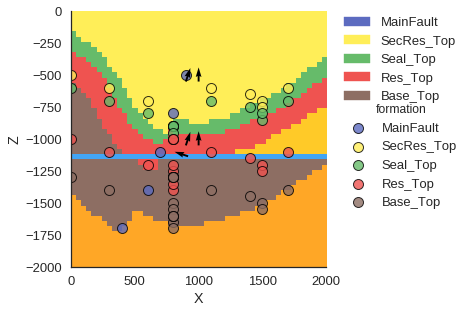

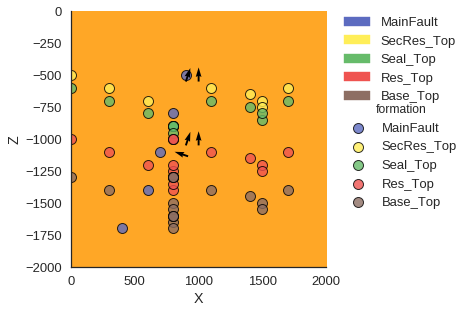

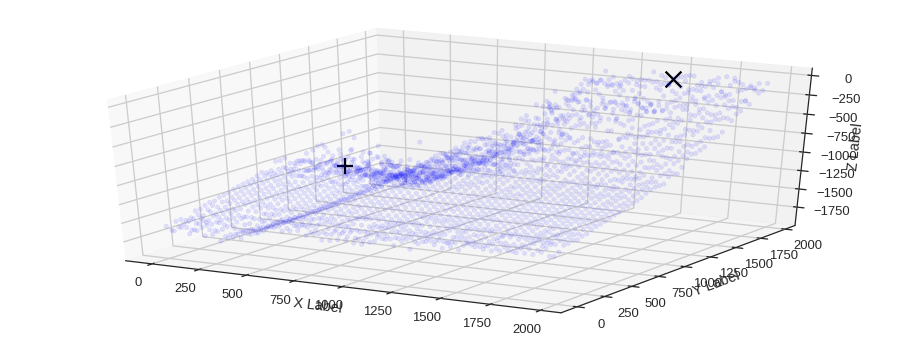

SPILL POINT: [ 1510.20410156  1918.36730957  -107.1940286 ]
Leak Point: [  244.89796448  1142.85717773 -1234.18623156]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 378
TRAP FOUND, section: 378
Checking Section: 299
Checking Section: 329
TRAP FOUND, section: 329
Checking Section: 298
Checking Section: 384
Checking Section: 333
Maximum reservoir volume: 128000.0 m³
 [-----------      30%                  ] 3 of 10 complete in 40.1 secZ-Variations top to bottom: -0.0020991465213003936 -0.005417676780322123 -0.0027874620190282955 -0.002385487730470303
Z-Variations top to bottom: -0.0020991465213003936 -0.005417676780322123 -0.0027874620190282955 0.006825986457947238
Z-Variations top to bottom: -0.0020991465213003936 -0.01180304312514118 -0.0027874620190282955 0.006825986457947238
Z-Variations top to bottom: -0.0020991465213003936 -0.005417676780322123 -0.018107769678290198 0.006825986457947238


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.647903241412939e-14
  ' condition number: {}'.format(rcond), RuntimeWarning)


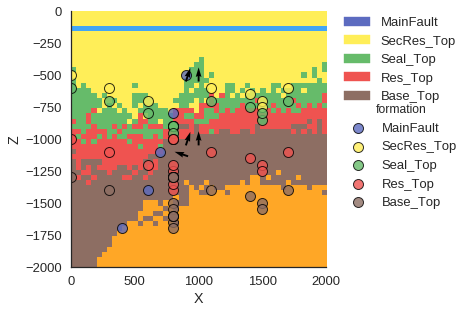

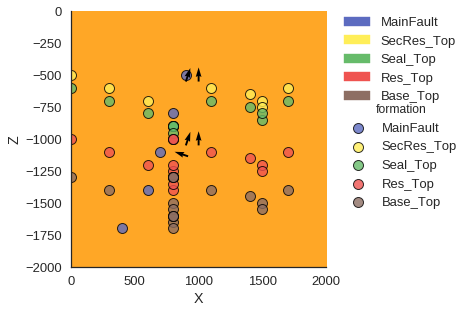

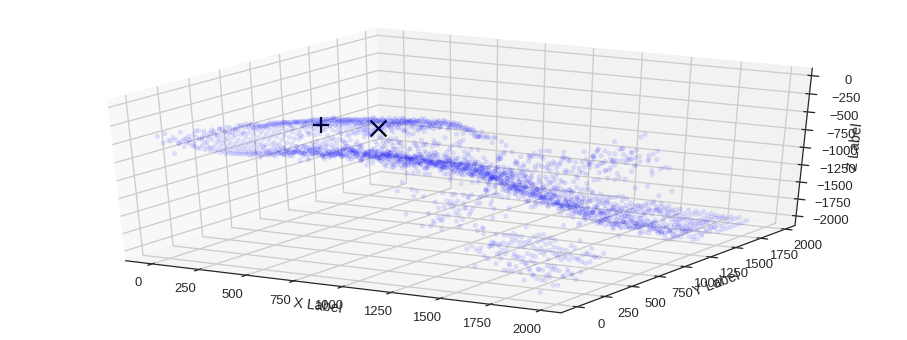

SPILL POINT: [ 1020.40814209   163.26530457  -102.6926217 ]
Leak Point: [ 816.32653809   40.81632614  -62.15834072]
Fault leak point above spill point.
...but fault sealing. Down to spill.
Checking Section: 525
TRAP FOUND, section: 525
Checking Section: 448
TRAP FOUND, section: 448
Checking Section: 447
Maximum reservoir volume: 128000.0 m³
 [---------------  40%                  ] 4 of 10 complete in 54.8 secZ-Variations top to bottom: -0.0027280978112613845 -0.005417676780322123 -0.018107769678290198 0.006825986457947238
Z-Variations top to bottom: -0.0027280978112613845 -0.005417676780322123 -0.018107769678290198 -0.004295981877018441
Z-Variations top to bottom: -0.0027280978112613845 -0.003943069949338432 -0.018107769678290198 -0.004295981877018441
Z-Variations top to bottom: -0.0027280978112613845 -0.003943069949338432 -0.006608380566131434 -0.004295981877018441


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9894696443426565e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


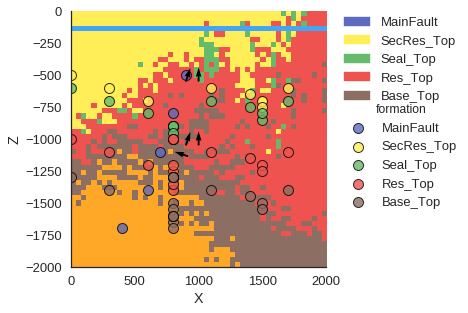

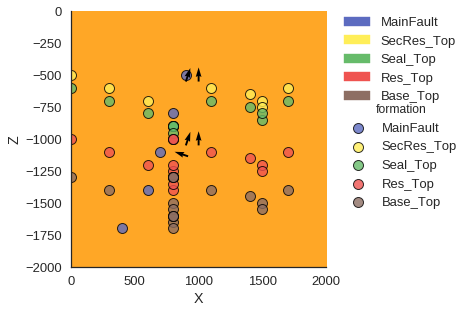

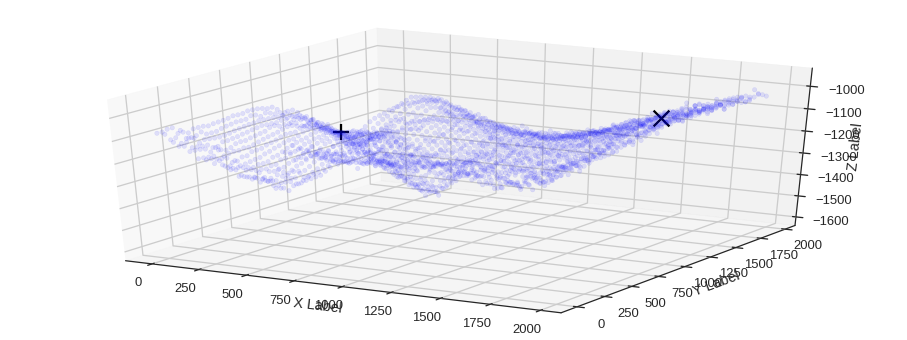

SPILL POINT: [ 1795.91833496  1265.30615234 -1040.        ]
Leak Point: [  408.16326904   857.1428833  -1163.90602924]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 43
TRAP FOUND, section: 43
Checking Section: 41
TRAP FOUND, section: 41
Checking Section: 42
Checking Section: 44
Checking Section: 28
TRAP FOUND, section: 28
Checking Section: 29
TRAP FOUND, section: 29
Checking Section: 40
Maximum reservoir volume: 1344000.0 m³
 [-----------------50%                  ] 5 of 10 complete in 68.5 secZ-Variations top to bottom: -0.003512907766149753 -0.003943069949338432 -0.006608380566131434 -0.004295981877018441
Z-Variations top to bottom: -0.0027280978112613845 -0.003943069949338432 -0.006608380566131434 -0.008222977150765639
Z-Variations top to bottom: -0.0027280978112613845 0.004098603599038654 -0.006608380566131434 -0.008222977150765639
Z-Variations top to bottom: -0.0027280978112613845 0.004098603599038654 -0.004663177251440272 -0.008222977150765639


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.992193215949456e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


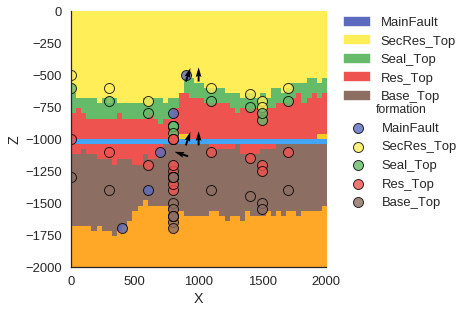

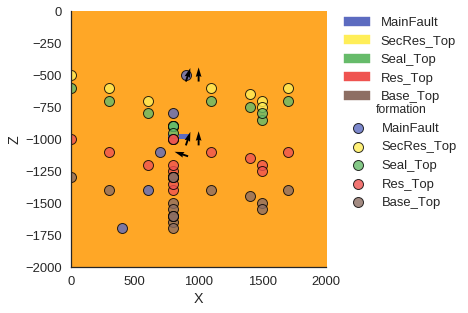

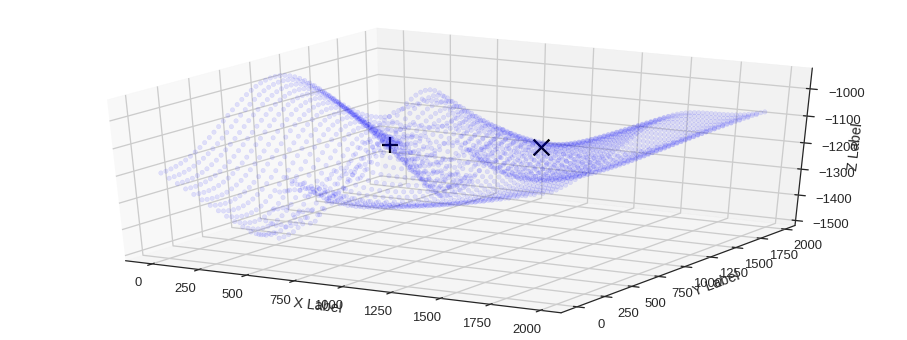

SPILL POINT: [ 1428.57141113   857.1428833  -1103.99293105]
Leak Point: [  612.24487305   938.7755127  -1167.81053322]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 18
TRAP FOUND, section: 18
Checking Section: 22
Maximum reservoir volume: 15744000.0 m³
 [-----------------60%--                ] 6 of 10 complete in 82.2 secZ-Variations top to bottom: -0.0019807432044770933 0.004098603599038654 -0.004663177251440272 -0.008222977150765639
Z-Variations top to bottom: -0.0019807432044770933 0.004098603599038654 -0.004663177251440272 -0.004879666269065598
Z-Variations top to bottom: -0.0019807432044770933 0.0011404840309478326 -0.004663177251440272 -0.004879666269065598
Z-Variations top to bottom: -0.0019807432044770933 0.0011404840309478326 -0.0005265683891906882 -0.004879666269065598

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.961763185184491e-12
  ' condition number: {}'.format(rcond), RuntimeWarning)


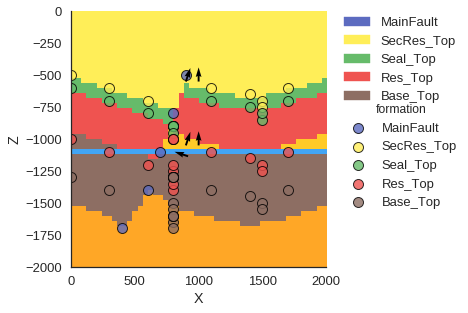

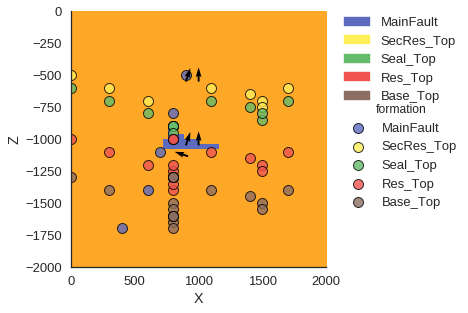

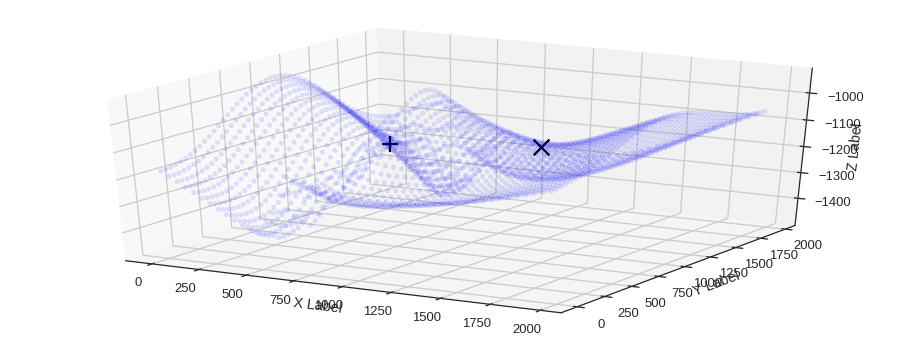

SPILL POINT: [ 1428.57141113   857.1428833  -1088.77709548]
Leak Point: [  612.24487305   938.7755127  -1152.83111653]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 22
Checking Section: 19
TRAP FOUND, section: 19
Maximum reservoir volume: 20672000.0 m³
 [-----------------70%------            ] 7 of 10 complete in 94.6 secZ-Variations top to bottom: -0.002125503646388001 0.0011404840309478326 -0.0005265683891906882 -0.004879666269065598
Z-Variations top to bottom: -0.002125503646388001 0.0011404840309478326 -0.0005265683891906882 0.01162519774948148
Z-Variations top to bottom: -0.002125503646388001 0.00042772343567543233 -0.0005265683891906882 0.01162519774948148
Z-Variations top to bottom: -0.002125503646388001 0.00042772343567543233 0.002561132614918892 0.01162519774948148


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.992053917654335e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


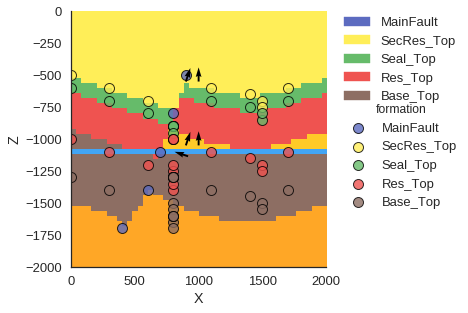

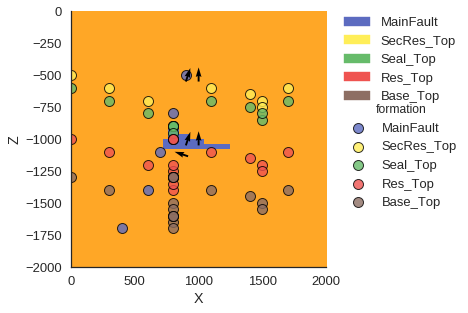

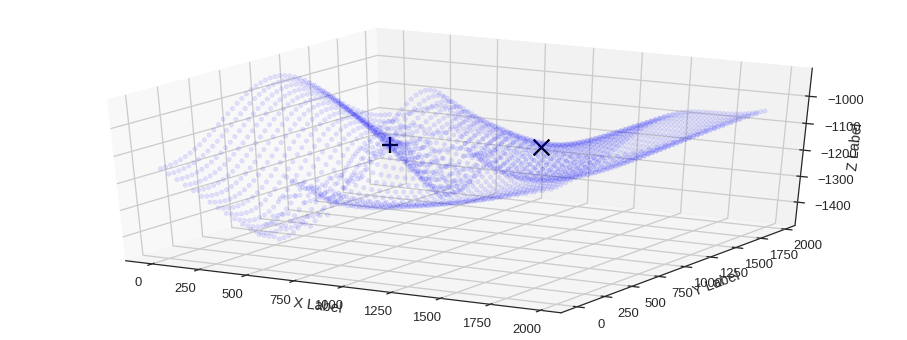

SPILL POINT: [ 1428.57141113   857.1428833  -1077.62863194]
Leak Point: [  612.24487305   938.7755127  -1141.72203336]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 22
Checking Section: 19
TRAP FOUND, section: 19
Maximum reservoir volume: 11200000.0 m³
 [-----------------80%----------        ] 8 of 10 complete in 106.8 secZ-Variations top to bottom: -0.0004504514573546157 0.00042772343567543233 0.002561132614918892 0.01162519774948148
Z-Variations top to bottom: -0.0004504514573546157 0.00042772343567543233 0.002561132614918892 0.009626401361198368
Z-Variations top to bottom: -0.0004504514573546157 -0.004175401824398118 0.002561132614918892 0.009626401361198368
Z-Variations top to bottom: -0.0004504514573546157 0.00042772343567543233 -0.0005075363269390469 0.009626401361198368


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.0011973942050498e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


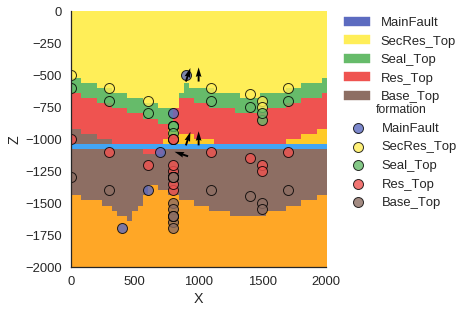

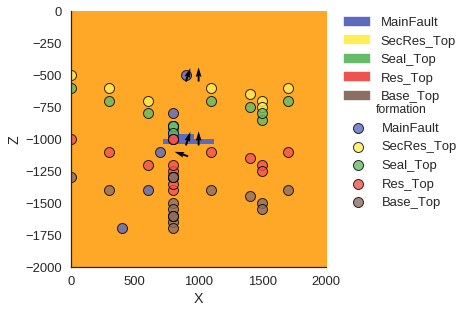

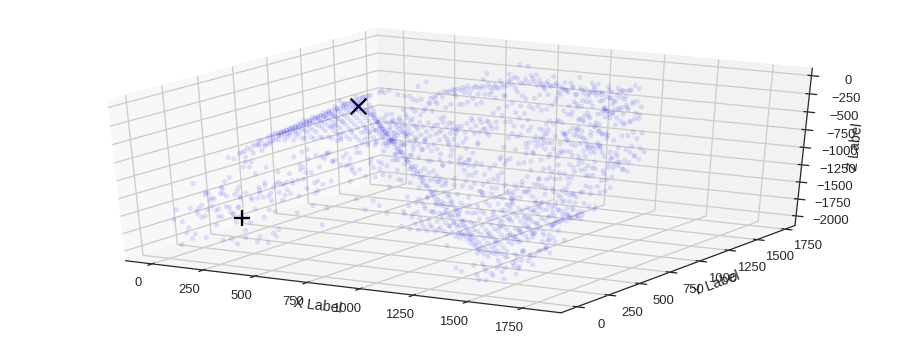

SPILL POINT: [ 653.06121826  448.97958374  -51.62819983]
Leak Point: [  204.08163452   244.89796448 -1634.51493143]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 628
Checking Section: 550
Checking Section: 519
Checking Section: 553
Checking Section: 574
Checking Section: 584
Checking Section: 511
Checking Section: 499
Checking Section: 474
Checking Section: 615
Checking Section: 621
Checking Section: 590
Checking Section: 463
No trap found! =(
Maximum reservoir volume: 0.0 m³
 [-----------------90%--------------    ] 9 of 10 complete in 120.8 secZ-Variations top to bottom: -0.0004435534797950136 0.00042772343567543233 -0.0005075363269390469 0.009626401361198368
Z-Variations top to bottom: -0.0004435534797950136 0.00042772343567543233 -0.0005075363269390469 -0.0029029990373910207
Z-Variations top to bottom: -0.0004435534797950136 0.004830943950792269 -0.0005075363269390469 -0.0029029990373910207
Z-Variations top to bottom: -0.0004435534797950136 0.00042772

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.338283272051563e-15
  ' condition number: {}'.format(rcond), RuntimeWarning)


Z-Variations top to bottom: -0.0004435534797950136 0.00042772343567543233 -0.0005075363269390469 -0.0029029990373910207


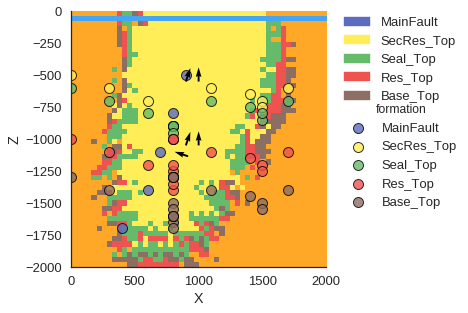

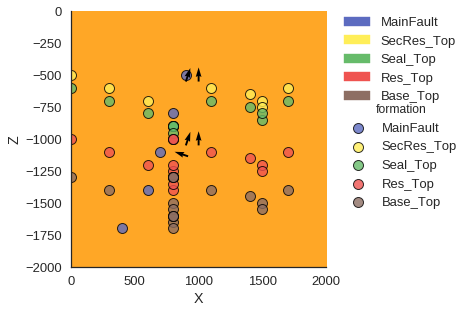

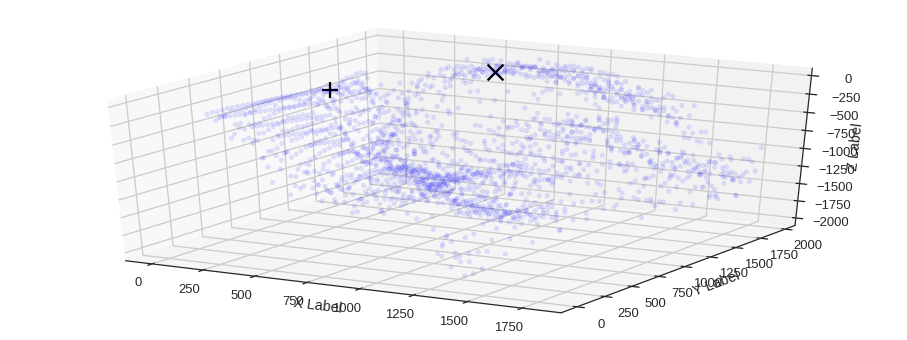

SPILL POINT: [  693.87756348  1632.65307617   -80.        ]
Leak Point: [ 285.71429443  938.7755127  -140.77120199]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 802
Checking Section: 749
Checking Section: 926
Checking Section: 771
Checking Section: 929
Checking Section: 772
Checking Section: 832
Checking Section: 870
Checking Section: 856
Checking Section: 645
TRAP FOUND, section: 645
Checking Section: 678
Checking Section: 932
Checking Section: 877
Checking Section: 743
Checking Section: 745
Checking Section: 982
Checking Section: 821
Checking Section: 787
TRAP FOUND, section: 787
Checking Section: 649
Checking Section: 851
Checking Section: 809
Checking Section: 796
Checking Section: 1016
Checking Section: 1102
TRAP FOUND, section: 1102
Maximum reservoir volume: 192000.0 m³
 [-----------------100%-----------------] 10 of 10 complete in 136.6 secZ-Variations top to bottom: -0.0021066387254025853 0.00042772343567543233 -0.0005075363269390469 -0.002902999

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.7280090530589097e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


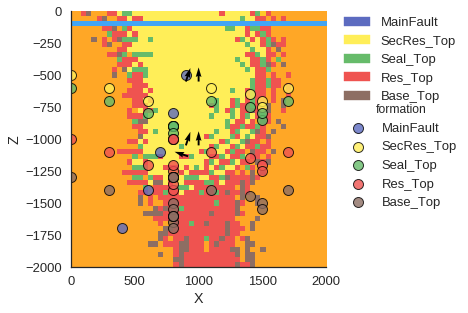

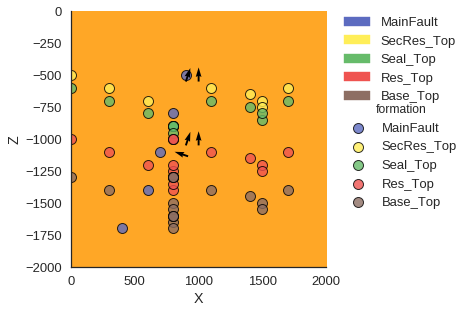

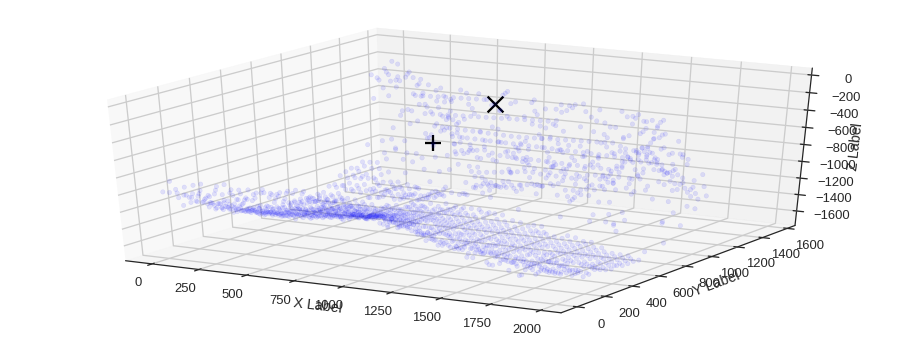

SPILL POINT: [ 979.59185791  979.59185791 -246.23847537]
Leak Point: [  571.42858887  1102.04077148  -849.0938442 ]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 154
No trap found! =(
Maximum reservoir volume: 0.0 m³
 [------------------110%-------------------] 11 of 10 complete in 149.4 sec

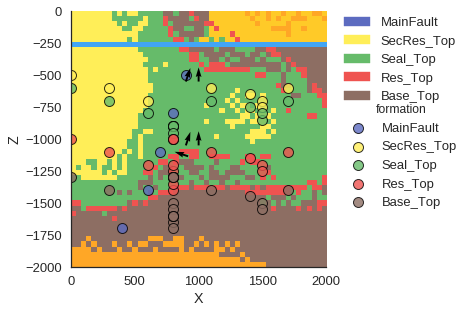

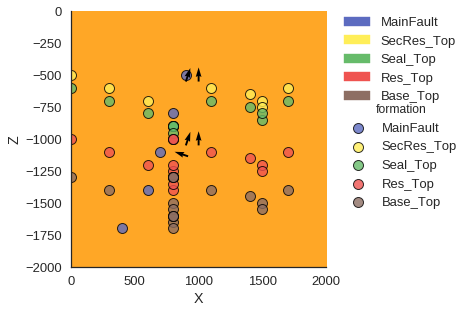

In [453]:
#model = pymc.Model([pos_unc_model, z_unc_res_top, fault_sealing, fw_th, hw_th, 
#                    res_th_likelihood, seal_th_likelihood, sec_res_th_likelihood])
model = pymc.Model([interp_unc, z_unc_res_top, fault_sealing, structural_model, 
                    res_th, seal_th, sec_res_th, 
                    res_th_likelihood, seal_th_likelihood, sec_res_th_likelihood])


M = pymc.MCMC(model)
M.sample(iter=iterations)

In [454]:
res_top_unc_trace = M.trace('z_unc_res_top')[:]
fault_sealing_trace = M.trace('fault_sealing_unc')[:]
structural_model_trace = M.trace('structural_model')[:] #[0]=lith_sol,[1]=fault:sol,[2]=max_volume

fw_res_th_trace = M.trace('res_th')[:]
fw_seal_th_trace = M.trace('seal_th')[:]
fw_sec_res_th_trace = M.trace('sec_res_th')[:]

interp_trace = M.trace('interp_unc')[:]

#for j in range(iterations):
#    plt.figure()
#    #plt.title('Change in res_top: %s' % bla[j])
#    #print(bla[j])
#    if fault_sealing == True:
#        print("Fault is sealed.")
#    else:
#        print("Fault is permeable.")
#    print("Max. trap volume = ", trap_volume_trace[j][2])
#    gp.plot_section(geo_data, trap_volume_trace[j][0][0,0], 25, plot_data =1)

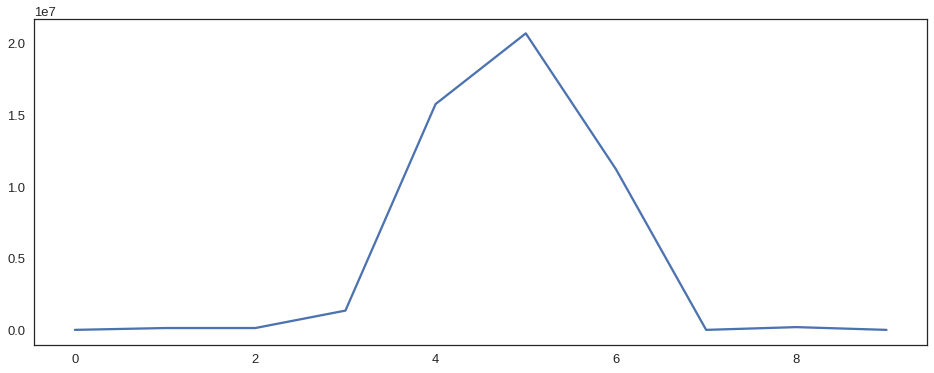

In [455]:
max_volume_trace = structural_model_trace[:,2]
plt.plot(max_volume_trace)

ZeroDivisionError: integer division or modulo by zero

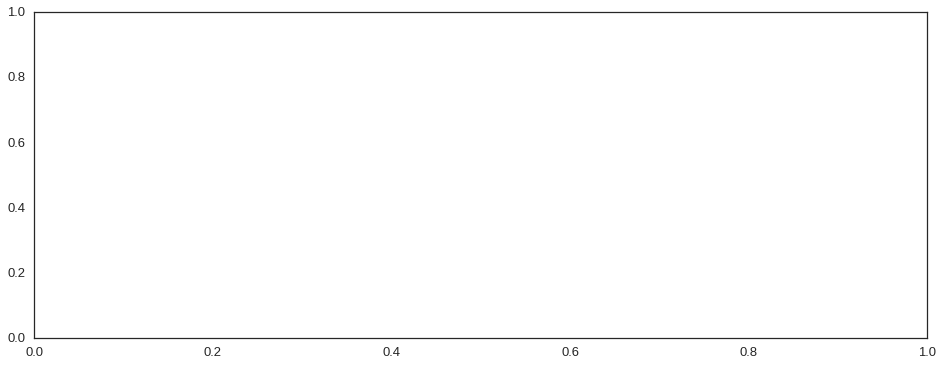

In [456]:
plt.plot(fw_res_th_trace)
plt.plot(fw_seal_th_trace)
plt.plot(fw_sec_res_th_trace)

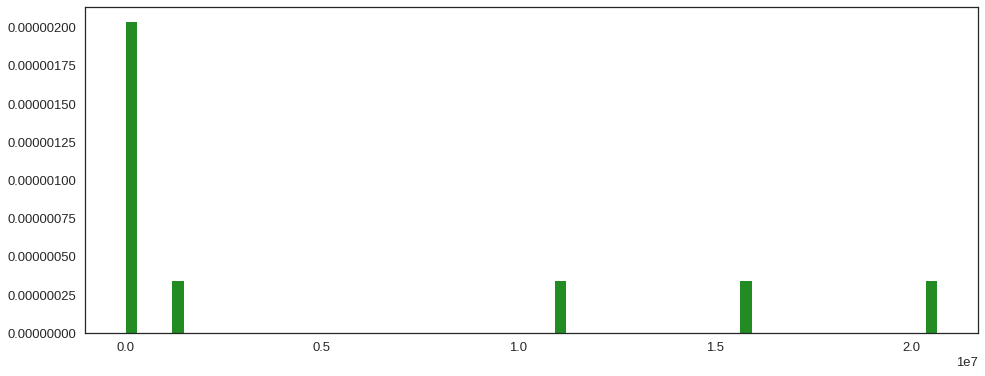

In [457]:
figsize(16, 6)

#_hist1 = plt.hist(max_volume_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")
volumes = max_volume_trace
mask = volumes == 0
masked_trace = volumes[~mask]
_hist1 = plt.hist(max_volume_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "forestgreen")
#_hist1 = plt.hist(masked_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")

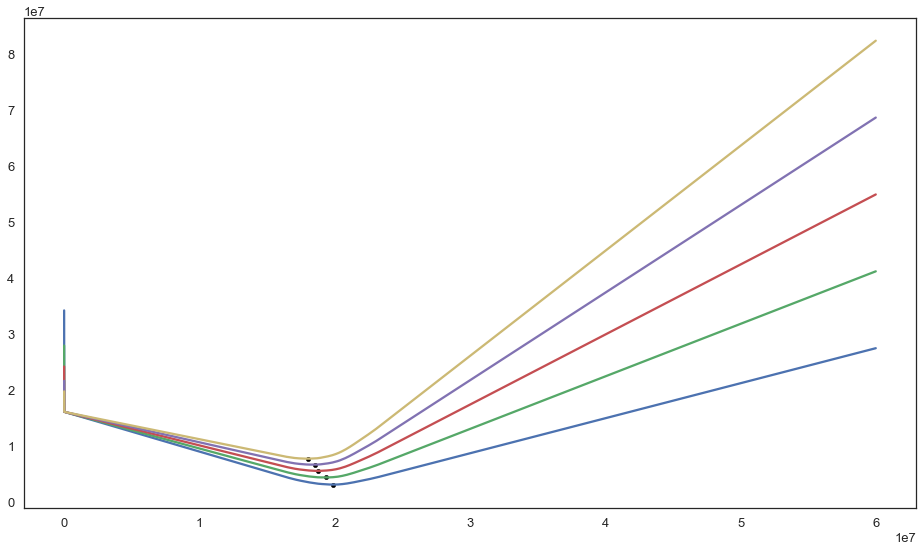

In [52]:
figsize(16, 9)

# No reduced uncertainty, different risks
BA_before = np.zeros_like(risks_s)
EL_before = np.zeros_like(risks_s)
expected_loss = lambda estimate_s, risk_s: volume_lossR(estimate_s, masked_trace, risk_s).mean()

counter = 0
for r in risks_s:
    loss = [expected_loss(e, r) for e in estimates_s]
    _min_score = sop.fmin(expected_loss, -40, args=(r,),disp = False)
    #print(_min_score)
    if _min_score < 0:
        _min_score = 0
    plt.plot(estimates_s, loss, label = "Risk r "+str(r))
    plt.scatter(_min_score, expected_loss(_min_score,r), s = 20, color = 'black')
    #lt.vlines(_min_results, 0, 0.02, color = 'black', linestyles="--")
    #print("Bayes action (minimum) at risk r %.2f: %.2f" % (r, _min_score))
    BA_before[counter] = _min_score
    EL_before[counter] = expected_loss(_min_score,r)
    counter += 1


In [12]:
# DETERMINATION OF LAYER THICKNESSES ON HANGING- AND FOOTWALL BASED ON VOXEL-COUNTING
#fault_block = fault_sol[0,0]
#lith_block = lith_sol[0,0]
#th_factor = scale_factor
#
## Finding fault tips, upper and lower
#def find_fault_tips(fault_block):
#    fault_reshape = fault_block.reshape(50,50,50)
#    upper_fault_tip = np.count_nonzero(fault_reshape[:,25,49])+1
#    lower_fault_tip = np.count_nonzero(fault_reshape[:,25,0])-1
#    return upper_fault_tip, lower_fault_tip
#    
## Footwall thicknesses
#def fw_thicknesses(lith_block, upper_fault_tip, th_factor):
#    lith_reshape = lith_block.reshape(50,50,50)
#    fw_reservoir_count = 0
#    fw_seal_count = 0 
#    fw_sec_res_count = 0 
#    for i in lith_reshape[upper_fault_tip,25,:]:
#        if i == (interp_data.get_formation_number()['Reservoir']):
#            fw_reservoir_count += 1
#            fw_reservoir_thickness = fw_reservoir_count * th_factor
#        elif i == (interp_data.get_formation_number()['Seal']):
#            fw_seal_count += 1
#            fw_seal_thickness = fw_seal_count * th_factor
#        elif i == (interp_data.get_formation_number()['SecondaryReservoir']):
#            fw_sec_res_count += 1
#            fw_sec_res_thickness = fw_sec_res_count * th_factor
#    return fw_reservoir_thickness, fw_seal_thickness, fw_sec_res_thickness
#
## Hanging wall thicknesses
#def hw_thicknesses(lith_block, lower_fault_tip, th_factor):
#    hw_reservoir_count = 0
#    hw_seal_count = 0 
#    hw_sec_res_count = 0 
#    for i in lith_reshape[lower_fault_tip,25,:]:
#        if i == (interp_data.get_formation_number()['Reservoir']):
#            hw_reservoir_count += 1
#            hw_reservoir_thickness = hw_reservoir_count * th_factor
#        elif i == (interp_data.get_formation_number()['Seal']):
#            hw_seal_count += 1
#            hw_seal_thickness = hw_seal_count * th_factor
#        elif i == (interp_data.get_formation_number()['SecondaryReservoir']):
#            hw_sec_res_count += 1
#            hw_sec_res_thickness = hw_sec_res_count * th_factor
#    return hw_reservoir_thickness, hw_seal_thickness, hw_sec_res_thickness

# DETERMINING THICKNESS BASED ON Z-POINT_POSITIONS IN INTERP_DATA

# Footwall at X = 1600 and Y = 1000
#def fw_thicknesses(interp_data):
#    res_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'
#    seal_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Seal'
#    sec_res_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'SecondaryReservoir'
#    over_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Overlying'
#    
#    rescale_f = interp_data.rescaling_factor
#    
#    fw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (1400/rescale_f))
#    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
#    points_fw = interp_data.geo_data_res.interfaces[fw_x_cond]
#    points_fw = points_fw[y_mid]
#    
#    fw_rb_z = points_fw[res_bot_cond]['Z'].values*rescale_f
#    fw_sb_z = points_fw[seal_bot_cond]['Z'].values*rescale_f
#    fw_r2b_z = points_fw[sec_res_bot_cond]['Z'].values*rescale_f
#    fw_ob_z = points_fw[over_bot_cond]['Z'].values*rescale_f
#    
#    fw_res_th = np.abs(fw_sb_z-fw_rb_z)
#    fw_seal_th = np.abs(fw_r2b_z-fw_sb_z)
#    fw_sec_res_th = np.abs(fw_ob_z-fw_r2b_z)
#    return fw_res_th, fw_seal_th, fw_sec_res_th, fw_rb_z, fw_sb_z, fw_r2b_z, fw_ob_z
#
## Hanging wall at X = 600 and Y = 1000
#def hw_thicknesses(interp_data):
#    res_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'
#    seal_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Seal'
#    sec_res_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'SecondaryReservoir'
#    over_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Overlying'
#    
#    rescale_f = interp_data.rescaling_factor
#    
#    hw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (400/rescale_f))
#    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
#    points_hw = interp_data.geo_data_res.interfaces[hw_x_cond]
#    points_hw = points_hw[y_mid]
#    
#    hw_rb_z = points_hw[res_bot_cond]['Z']
#    hw_sb_z = points_hw[seal_bot_cond]['Z']
#    hw_r2b_z = points_hw[sec_res_bot_cond]['Z']
#    hw_ob_z = points_hw[over_bot_cond]['Z']
#    
#    hw_res_th = np.abs(hw_sb_z.values-hw_rb_z.values)*rescale_f
#    hw_seal_th = np.abs(hw_r2b_z.values-hw_sb_z.values)*rescale_f
#    hw_sec_res_th = np.abs(hw_ob_z.values-hw_r2b_z.values)*rescale_f
#    return hw_res_th, hw_seal_th, hw_sec_res_th

# DETERMINING THICKNESS BASED ON Z-POINT_POSITIONS USING GEO_DATA
#res_bot_cond = geo_data.interfaces['formation'] == 'Reservoir'
#seal_bot_cond = geo_data.interfaces['formation'] == 'Seal'
#sec_res_bot_cond = geo_data.interfaces['formation'] == 'SecondaryReservoir'
#over_bot_cond = geo_data.interfaces['formation'] == 'Overlying'
#
#fw_x_cond = geo_data.interfaces['X'] == 1600
#y_mid = geo_data.interfaces['Y'] == 1000
#points_fw = geo_data.interfaces[fw_x_cond]
#points_fw = points_fw[y_mid]
## finding Z-values for each layer bottom
#fw_rb_z = points_fw[res_bot_cond]['Z']
#fw_sb_z = points_fw[seal_bot_cond]['Z']
#fw_r2b_z = points_fw[sec_res_bot_cond]['Z']
#fw_ob_z = points_fw[over_bot_cond]['Z']
#
#fw_res_th = np.abs(fw_sb_z.values-fw_rb_z.values)
#fw_seal_th = np.abs(fw_r2b_z.values-fw_sb_z.values)
#fw_sec_res_th = np.abs(fw_ob_z.values-fw_r2b_z.values)
#
#hw_x_cond = geo_data.interfaces['X'] == 600
#y_mid = geo_data.interfaces['Y'] == 1000
#points_hw = geo_data.interfaces[hw_x_cond]
#points_hw = points_hw[y_mid]
## finding Z-values for each layer bottom
#hw_rb_z = points_hw[res_bot_cond]['Z']
#hw_sb_z = points_hw[seal_bot_cond]['Z']
#hw_r2b_z = points_hw[sec_res_bot_cond]['Z']
#hw_ob_z = points_hw[over_bot_cond]['Z']
#
#hw_res_th = np.abs(hw_sb_z.values-hw_rb_z.values)
#hw_seal_th = np.abs(hw_r2b_z.values-hw_sb_z.values)
#hw_sec_res_th = np.abs(hw_ob_z.values-hw_r2b_z.values)
#
## Footwall
#def fw_thicknesses():
#    fw_x_cond = geo_data.interfaces['X'] == 1600
#    y_mid = geo_data.interfaces['Y'] == 1000
#    points_fw = geo_data.interfaces[fw_x_cond]
#    points_fw = points_fw[y_mid]
#    # finding Z-values for each layer bottom
#    fw_rb_z = points_fw[res_bot_cond]['Z']
#    fw_sb_z = points_fw[seal_bot_cond]['Z']
#    fw_r2b_z = points_fw[sec_res_bot_cond]['Z']
#    fw_ob_z = points_fw[over_bot_cond]['Z']
#    
#    fw_res_th = np.abs(fw_sb_z.values-fw_rb_z.values)
#    fw_seal_th = np.abs(fw_r2b_z.values-fw_sb_z.values)
#    fw_sec_res_th = np.abs(fw_ob_z.values-fw_r2b_z.values)
#
## Hanging wall
#def hw_thicknesses():
#    hw_x_cond = geo_data.interfaces['X'] == 600
#    y_mid = geo_data.interfaces['Y'] == 1000
#    points_hw = geo_data.interfaces[hw_x_cond]
#    points_hw = points_hw[y_mid]
#    # finding Z-values for each layer bottom
#    hw_rb_z = points_hw[res_bot_cond]['Z']
#    hw_sb_z = points_hw[seal_bot_cond]['Z']
#    hw_r2b_z = points_hw[sec_res_bot_cond]['Z']
#    hw_ob_z = points_hw[over_bot_cond]['Z']
#    
#    hw_res_th = np.abs(hw_sb_z.values-hw_rb_z.values)
#    hw_seal_th = np.abs(hw_r2b_z.values-hw_sb_z.values)
#    hw_sec_res_th = np.abs(hw_ob_z.values-hw_r2b_z.values)

In [206]:
#@pymc.deterministic
#def fault_tips(fault_sol=pos_unc_model[1]):
#    fault = fault_sol[0,0]
#    return find_fault_tips(fault)    
#
#@pymc.deterministic
#def fw_th(lith_sol=pos_unc_model[0], upper_fault_tip=fault_tips[0]):
#    lith = lith_sol[0,0]
#    #print("FOOTWALL RES THICKNESS:", fw_thicknesses(lith, upper_fault_tip, th_factor=scale_factor)[0])
#    #print("FOOTWALL SEAL THICKNESS:", fw_thicknesses(lith, upper_fault_tip, th_factor=scale_factor)[1])
#    return fw_thicknesses(lith, upper_fault_tip, th_factor=scale_factor)
#
#@pymc.deterministic
#def hw_th(lith_sol=pos_unc_model[0], lower_fault_tip=fault_tips[1]):
#    lith = lith_sol[0,0]
#    return hw_thicknesses(lith, lower_fault_tip, th_factor=scale_factor)